In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
colori_aggregati = pd.read_csv("Colori_aggregati.csv", encoding='utf-8')
df_esteso = pd.read_csv("Splittato_tutto.csv", encoding='utf-8')

In [27]:
colori_aggregati

,categoria,taglia,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori_split
0,Scarpe Sportive,35.5,uomo,PUMA,morphic - scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,white
1,Scarpe Sportive,35.5,uomo,PUMA,morphic - scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,warm white
2,Scarpe Sportive,35.5,uomo,PUMA,morphic - scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,sun struck
3,Scarpe Sportive,35.5,unisex,PUMA,prospect unisex - scarpe da allenamento - blac...,48.95,70.00,https://www.zalando.it/puma-prospect-unisex-sc...,prospect unisex,scarpe da allenamento,black/yellow alert/white
4,Scarpe Sportive,35.5,unisex,PUMA,pwr hybrid tr unisex - scarpe da allenamento -...,63.95,80.00,https://www.zalando.it/puma-pwr-hybrid-tr-unis...,pwr hybrid tr unisex,scarpe da allenamento,black
...,...,...,...,...,...,...,...,...,...,...,...
14224,Scarpe Sportive,47.0,donna,UNDER ARMOUR,scarpe da corsa su strada - white,130.00,130.00,https://www.zalando.it/under-armour-scarpe-da-...,unknown,scarpe da corsa su strada,white
14225,Scarpe Sportive,48.0,donna,PUMA,scarpe da allenamento - white/black,89.99,89.99,https://www.zalando.it/puma-unisex-scarpe-da-p...,unknown,scarpe da allenamento,white/black
14226,Scarpe Sportive,48.0,donna,PUMA,scarpe da allenamento - sun stream black caram...,89.99,89.99,https://www.zalando.it/puma-scarpe-da-allename...,unknown,scarpe da allenamento,sun stream black caramel latte
14227,Scarpe Sportive,48.0,donna,PUMA,scarpe da allenamento - black/white,89.99,89.99,https://www.zalando.it/puma-scarpe-da-pallaman...,unknown,scarpe da allenamento,black/white


In [29]:
df_esteso

,categoria,taglia,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori_split
0,Scarpe Sportive,35.5,uomo,PUMA,morphic - scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,white
1,Scarpe Sportive,35.5,uomo,PUMA,morphic - scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,warm white
2,Scarpe Sportive,35.5,uomo,PUMA,morphic - scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,sun struck
3,Scarpe Sportive,35.5,unisex,PUMA,prospect unisex - scarpe da allenamento - blac...,48.95,70.00,https://www.zalando.it/puma-prospect-unisex-sc...,prospect unisex,scarpe da allenamento,black/yellow alert/white
4,Scarpe Sportive,35.5,unisex,PUMA,pwr hybrid tr unisex - scarpe da allenamento -...,63.95,80.00,https://www.zalando.it/puma-pwr-hybrid-tr-unis...,pwr hybrid tr unisex,scarpe da allenamento,black
...,...,...,...,...,...,...,...,...,...,...,...
14224,Scarpe Sportive,47.0,donna,UNDER ARMOUR,scarpe da corsa su strada - white,130.00,130.00,https://www.zalando.it/under-armour-scarpe-da-...,unknown,scarpe da corsa su strada,white
14225,Scarpe Sportive,48.0,donna,PUMA,scarpe da allenamento - white/black,89.99,89.99,https://www.zalando.it/puma-unisex-scarpe-da-p...,unknown,scarpe da allenamento,white/black
14226,Scarpe Sportive,48.0,donna,PUMA,scarpe da allenamento - sun stream black caram...,89.99,89.99,https://www.zalando.it/puma-scarpe-da-allename...,unknown,scarpe da allenamento,sun stream black caramel latte
14227,Scarpe Sportive,48.0,donna,PUMA,scarpe da allenamento - black/white,89.99,89.99,https://www.zalando.it/puma-scarpe-da-pallaman...,unknown,scarpe da allenamento,black/white


In [31]:
colori_aggregati.info()

df_esteso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14229 entries, 0 to 14228
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   categoria         14229 non-null  object 
 1   taglia            14229 non-null  float64
 2   genere            14229 non-null  object 
 3   marca             14229 non-null  object 
 4   nome_prodotto     14229 non-null  object 
 5   prezzo_effettivo  14229 non-null  float64
 6   prezzo_ordinario  14229 non-null  float64
 7   url_prodotto      14229 non-null  object 
 8   modello           14229 non-null  object 
 9   sport             14229 non-null  object 
 10  colori_split      14229 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14229 entries, 0 to 14228
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   categoria         14

In [33]:
print("Statistiche descriptive di base:")
print(colori_aggregati.describe())
print(df_esteso.describe())

Statistiche descriptive di base:
             taglia  prezzo_effettivo  prezzo_ordinario
count  14229.000000      14229.000000      14229.000000
mean      41.565746        104.315068        116.272834
std        3.231484         46.372627         46.203396
min       35.000000         22.000000         22.950000
25%       39.500000         64.990000         79.990000
50%       41.000000         98.990000        109.990000
75%       43.000000        139.990000        149.990000
max       52.500000        255.000000        299.950000
             taglia  prezzo_effettivo  prezzo_ordinario
count  14229.000000      14229.000000      14229.000000
mean      41.565746        104.315068        116.272834
std        3.231484         46.372627         46.203396
min       35.000000         22.000000         22.950000
25%       39.500000         64.990000         79.990000
50%       41.000000         98.990000        109.990000
75%       43.000000        139.990000        149.990000
max       52.50

In [35]:
print("\nValori Unici per Colonne Categoriche:")
for col in ['marca', 'categoria', 'taglia', 'genere', 'modello', 'sport']:
    print(f"{col}: {colori_aggregati[col].nunique()} valori unici")


Valori Unici per Colonne Categoriche:
marca: 7 valori unici
categoria: 1 valori unici
taglia: 34 valori unici
genere: 3 valori unici
modello: 609 valori unici
sport: 19 valori unici


In [67]:
#1.Statistics data
statistics_table = df_esteso.pivot_table(index='marca', values='prezzo_effettivo', aggfunc=('mean', 'median', 'max', 'min'))
statistics_table.reset_index(inplace=True)
statistics_table.columns = ['marca', 'Max', 'Mean', 'Median', 'Min']
statistics_table.sort_values('Median', ascending=False, inplace=True)
statistics_table.index = np.arange(1, len(statistics_table) + 1)
statistics_table['Mean'] = statistics_table.apply(lambda x: np.round(x.Mean, 2), axis=1)

# Calcola la percentuale del prezzo ordinario per marca
totale_prezzi_effettivi = df_esteso['prezzo_effettivo'].sum()
percentuale_prezzi_effettivi = (df_esteso.groupby('marca')['prezzo_ordinario'].sum() / totale_prezzi_effettivi) * 100
percentuale_prezzi_effettivi = percentuale_prezzi_effettivi.round(2)
percentuale_prezzi_effettivi.name = 'Percentuale Prezzo Effettivo'

# Unisci la percentuale al DataFrame statistics_table
statistics_table = statistics_table.merge(percentuale_prezzi_effettivi, left_on='marca', right_index=True)

print('\nStatistics table per prezzo_effettivo:')
print(statistics_table)


# 2.Statistics data
statistics_table = df_esteso.pivot_table(index='marca', values='prezzo_ordinario', aggfunc=('mean', 'median', 'max', 'min'))
statistics_table.reset_index(inplace=True)
statistics_table.columns = ['marca', 'Max', 'Mean', 'Median', 'Min']
statistics_table.sort_values('Median', ascending=False, inplace=True)
statistics_table.index = np.arange(1, len(statistics_table) + 1)
statistics_table['Mean'] = statistics_table.apply(lambda x: np.round(x.Mean, 2), axis=1)

# Calcola la percentuale del prezzo ordinario per marca
totale_prezzi_ordinari = df_esteso['prezzo_ordinario'].sum()
percentuale_prezzi_ordinari = (df_esteso.groupby('marca')['prezzo_ordinario'].sum() / totale_prezzi_ordinari) * 100
percentuale_prezzi_ordinari = percentuale_prezzi_ordinari.round(2)
percentuale_prezzi_ordinari.name = 'Percentuale Prezzi Ordinari'

# Unisci la percentuale al DataFrame statistics_table
statistics_table = statistics_table.merge(percentuale_prezzi_ordinari, left_on='marca', right_index=True)

print('\nStatistics table per prezzo_ordinario:')
print(statistics_table)

#3.Statistics data
statistics_table = df_esteso.pivot_table(index='marca', values='taglia', aggfunc=('mean', 'median', 'max', 'min'))
statistics_table.reset_index(inplace=True)
statistics_table.columns = ['marca', 'Max', 'Mean', 'Median', 'Min']
statistics_table.sort_values('Median', ascending=False, inplace=True)
statistics_table.index = np.arange(1, len(statistics_table) + 1)
statistics_table['Mean'] = statistics_table.apply(lambda x: np.round(x.Mean, 2), axis=1)

# Calcola la percentuale della per marca
totale_taglie = df_esteso['taglia'].sum()
percentuale_taglie = (df_esteso.groupby('marca')['taglia'].sum() / totale_taglie) * 100
percentuale_taglie = percentuale_taglie.round(2)
percentuale_taglie.name = 'Percentuale sulle taglie'

# Unisci la percentuale al DataFrame statistics_table
statistics_table = statistics_table.merge(percentuale_taglie, left_on='marca', right_index=True)
print('\nStatistics table taglia:')
print(statistics_table)



Statistics table per prezzo_effettivo:
          marca     Max    Mean  Median    Min  Percentuale Prezzo Effettivo
1        MIZUNO  210.00  127.34  134.99  41.99                         10.35
2         ASICS  255.00  122.46  119.99  50.99                         27.22
3   NEW BALANCE  209.99  121.76  115.00  54.99                         13.21
4  UNDER ARMOUR  249.99  111.45  110.00  22.95                         18.86
5       DIADORA  247.46   96.73   69.99  45.00                          0.44
6          JOMA  129.99   67.93   64.99  25.39                          2.13
7          PUMA  240.00   85.19   64.99  22.00                         39.25

Statistics table per prezzo_ordinario:
          marca     Max    Mean  Median    Min  Percentuale Prezzi Ordinari
1        MIZUNO  219.99  141.06  149.99  64.99                         9.29
2         ASICS  255.00  127.09  129.99  59.99                        24.42
3   NEW BALANCE  230.00  131.71  129.99  69.99                        11.85


#### Siccome ogni scarpa ha una o piu taglie, raggrupiamo per vedere essattamente che modelli abbiamo raccolto
#### Per questo, vado a creare un nuovo dataframe con le informazioni necessarie

In [70]:
# Raggruppa per le colonne specificate e conta le taglie uniche
modello_unici = colori_aggregati.groupby(['genere', 'marca', 'nome_prodotto', 'prezzo_effettivo', 'prezzo_ordinario', 'modello', 'sport', 'colori_split']).agg(
    numero_taglie=('taglia', 'nunique')
).reset_index()

# Visualizza il nuovo DataFrame
print(modello_unici.head())

# Opzionale: puoi ordinare il DataFrame per numero di taglie per vedere i modelli con più varietà
modello_unici = modello_unici.sort_values(by='numero_taglie', ascending=False)
print("\nDataFrame ordinato per numero di taglie:")
print(display(modello_unici)) #tms DataFrame con colori e taglia aggregati

  genere  marca                                      nome_prodotto  \
0  donna  ASICS  beyond ff - scarpe da pallavolo - light blue/w...   
1  donna  ASICS         beyond ff mt - scarpe da pallavolo - blanc   
2  donna  ASICS  blade ff - scarpe da pallavolo - light blue/bl...   
3  donna  ASICS  court 3 - scarpe da tennis per tutte le superf...   
4  donna  ASICS  court ff 3 - da tennis per terra battuta - ind...   

   prezzo_effettivo  prezzo_ordinario       modello  \
0            107.99            119.99     beyond ff   
1            115.00            130.00  beyond ff mt   
2            107.99            119.99      blade ff   
3            151.99            189.99       court 3   
4            151.99            189.99    court ff 3   

                                     sport           colori_split  \
0                      scarpe da pallavolo       light blue/white   
1                      scarpe da pallavolo                  blanc   
2                      scarpe da pallavol

,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,modello,sport,colori_split,numero_taglie
798,unisex,UNDER ARMOUR,reign lifter unisex - scarpe da allenamento - ...,199.99,199.99,reign lifter unisex,scarpe da allenamento,black/white,22
579,donna,UNDER ARMOUR,apparition - scarpe da allenamento - white/cas...,90.99,129.99,apparition,scarpe da allenamento,white/castlerock/ares red,19
676,donna,UNDER ARMOUR,scarpe da corsa su strada - white,130.00,130.00,unknown,scarpe da corsa su strada,white,19
711,unisex,NEW BALANCE,480 unisex - scarpe da basket - dark mushroom,99.99,99.99,480 unisex,scarpe da basket,dark mushroom,19
741,unisex,PUMA,cell thrill unisex - scarpe da allenamento - b...,64.99,64.99,cell thrill unisex,scarpe da allenamento,black black,19
...,...,...,...,...,...,...,...,...,...
1633,uomo,PUMA,ultra match fg/ag - scarpe da calcetto con tac...,71.37,84.95,ultra match fg/ag,scarpe da calcetto con tacchetti,black/asphalt,1
1324,uomo,PUMA,deviate nitro - scarpe da corsa su strada - bl...,170.00,170.00,deviate nitro,scarpe da corsa su strada,black sun stream,1
1641,uomo,PUMA,ultra match mg - scarpe da calcetto con tacche...,47.50,47.50,ultra match mg,scarpe da calcetto con tacchetti,poison pink/white/black,1
1642,uomo,PUMA,ultra match tt - scarpe da calcetto con tacche...,71.37,84.95,ultra match tt,scarpe da calcetto con tacchetti,black/asphalt,1


None


### Analisi della distribuzione delle marche

In [75]:
# contare quanti dati offre ogni marca per avere un'idea della loro distribuzione
marca_somma = modello_unici['marca'].value_counts()
print(f'Quanti dati abbiamo per ogni marca: {marca_somma}')

Quanti dati abbiamo per ogni marca: marca
PUMA            700
ASICS           381
UNDER ARMOUR    299
NEW BALANCE     190
MIZUNO          144
JOMA             97
DIADORA          18
Name: count, dtype: int64


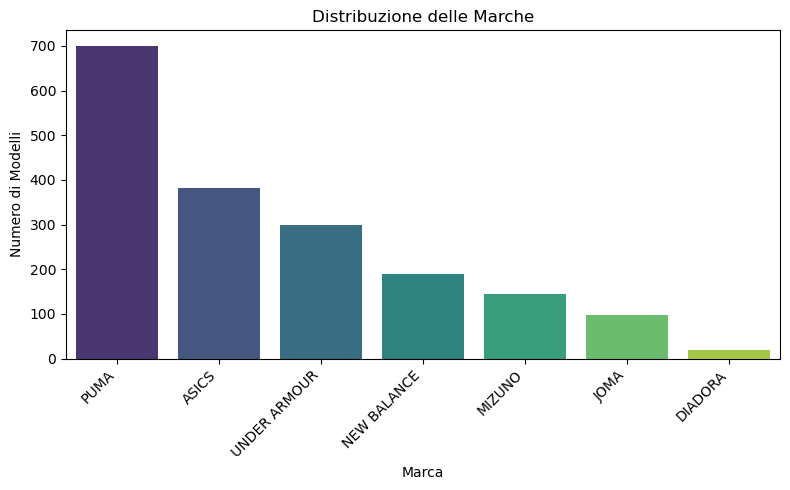

In [77]:
plt.figure(figsize=(8, 5))
sns.barplot(x=marca_somma.index, y=marca_somma.values, hue=marca_somma.index, palette="viridis", legend=False)

plt.title('Distribuzione delle Marche')

plt.xlabel('Marca')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

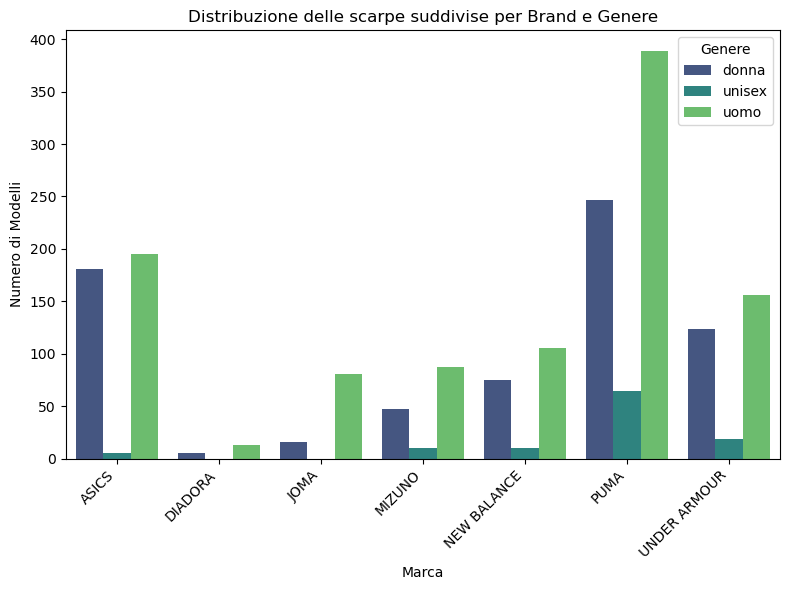

In [78]:
# facciamo un graffico con la distribuzione delle scarpe suddivise per marca e genere sul sito Zalando
marca_genere_somma = modello_unici.groupby(['marca', 'genere']).size().reset_index(name='Numero')

plt.figure(figsize=(8, 6))
sns.barplot(data=marca_genere_somma, x='marca', y='Numero', hue='genere', palette="viridis")

plt.title('Distribuzione delle scarpe suddivise per Brand e Genere')
plt.xlabel('Marca')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()

In [80]:
# Per vedere il numero reale di modello per categoria sport prenderemmo i dati dal modello_unici, perche nel csv lo stesso modello si ripete per ogni taglia presente
sport_conteggio = modello_unici['sport'].value_counts()
print('\nNumero di modelli per categoria:')
print(sport_conteggio)


Numero di modelli per categoria:
sport
scarpe da corsa su strada                  573
scarpe da calcetto con tacchetti           310
scarpe da allenamento                      184
scarpe da trail running                    145
scarpe da basket                           145
scarpe da pallavolo                         84
scarpe da pallamano                         64
da tennis per terra battuta                 61
scarpe da tennis per tutte le superfici     59
scarpe da calcetto                          43
scarpe da golf                              38
scarpe da calcio con tacchetti              36
scarpe da padel                             31
scarpe da camminata                         24
ciabatte da mare                            20
scarpa da hiking                             5
scarpa da rugby                              4
scarponi da montagna                         2
stivali da neve                              1
Name: count, dtype: int64


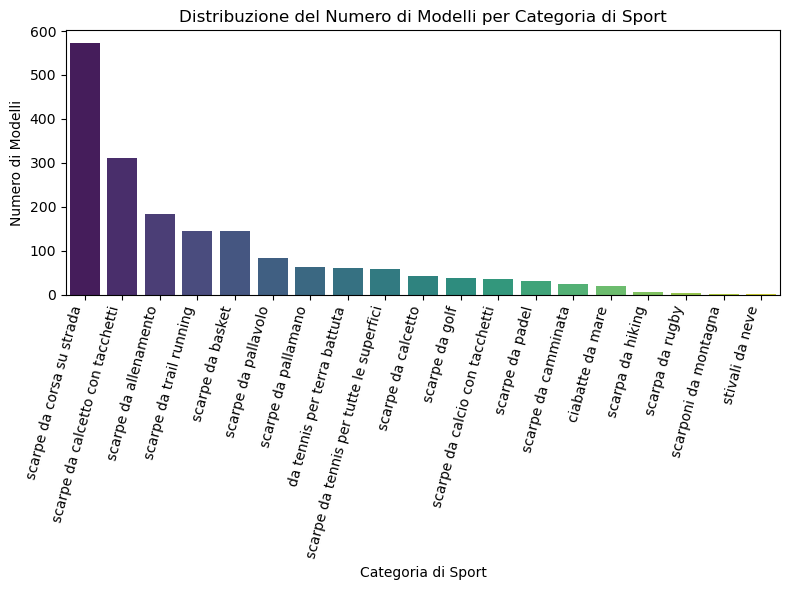

In [81]:
# prova visualizzazzione con un barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=sport_conteggio.index, y=sport_conteggio.values, hue=sport_conteggio.index, palette="viridis", legend=False)
plt.title('Distribuzione del Numero di Modelli per Categoria di Sport')
plt.xlabel('Categoria di Sport')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

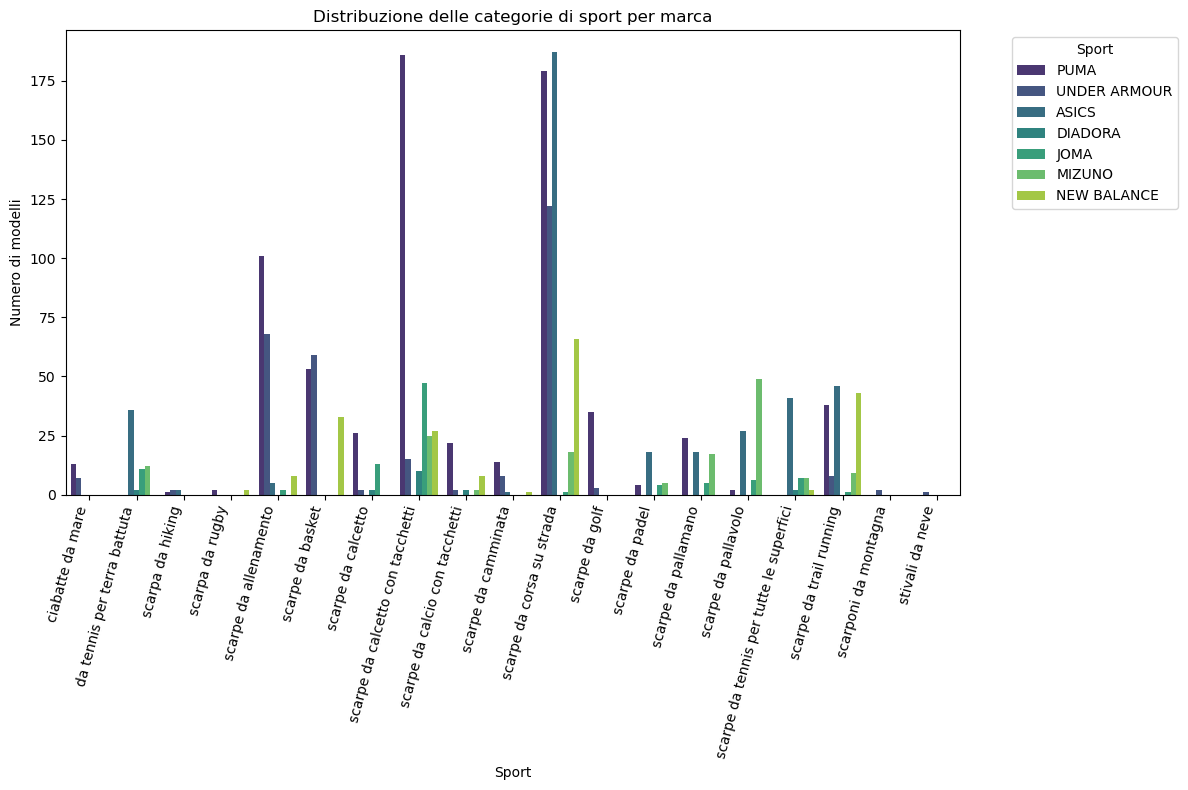

In [84]:
# Raggruppa i modelli per marca e sport e conta il numero di modelli
modelli_per_marca = modello_unici.groupby(['sport', 'marca']).size().reset_index(name='numero_modelli')

# Crea il grafico a barre
plt.figure(figsize=(12,8))
sns.barplot(x='sport', y='numero_modelli', hue='marca', data=modelli_per_marca, palette='viridis')

plt.xlabel('Sport')
plt.ylabel('Numero di modelli')
plt.title('Distribuzione delle categorie di sport per marca')
plt.xticks(rotation=75, ha='right')
plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()            

### Analisi della presenza del Brand sul sito Zalando


Numero di prodotti trovati sul sito Zalando: 1089

Numero di prodotti da ciascuna marca:
marca
PUMA            5673
ASICS           3179
UNDER ARMOUR    2295
NEW BALANCE     1489
MIZUNO          1089
JOMA             444
DIADORA           60
Name: count, dtype: int64


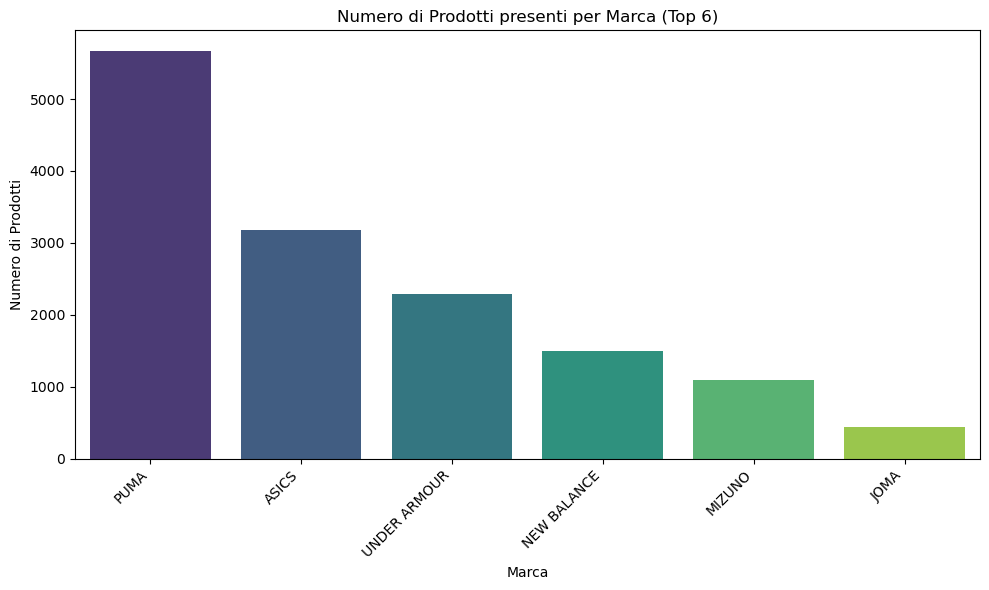

In [87]:
brand = 'MIZUNO'

# Numero totale di modelli offerti dal brand del committente
num_prodotti = len(df_esteso[df_esteso['marca'] == brand])
print(f"\nNumero di prodotti trovati sul sito Zalando: {num_prodotti}")

# Confronto con i competitor (numero di modelli per marca)
prod_per_marca = df_esteso['marca'].value_counts()
print("\nNumero di prodotti da ciascuna marca:")
print(prod_per_marca)

# Visualizzazione del confronto (top competitor)
top_n_marche = prod_per_marca.nlargest(6) # Include il brand del committente e i 5 competitor principali
plt.figure(figsize=(10, 6))
sns.barplot(x=top_n_marche.index, y=top_n_marche.values, hue=top_n_marche.index, palette="viridis", legend=False)
plt.title('Numero di Prodotti presenti per Marca (Top 6)')
plt.xlabel('Marca')
plt.ylabel('Numero di Prodotti')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
# raggruppa i dati per categoria di sport
raggruppa_sport_marca = modello_unici.groupby(['sport', 'marca'])[['prezzo_effettivo', 'prezzo_ordinario']].sum()

In [58]:
raggruppa_sport_marca  = raggruppa_sport_marca .sort_values(by=["prezzo_effettivo", "prezzo_ordinario"])
raggruppa_sport_marca 

prezzo_effettivo  \
sport                            marca                            
scarpe da corsa su strada        JOMA                     47.73   
scarpe da trail running          JOMA                     50.00   
scarpe da camminata              ASICS                    69.99   
scarpa da hiking                 PUMA                     82.95   
scarpe da camminata              NEW BALANCE              99.95   
...                                                         ...   
scarpe da corsa su strada        NEW BALANCE            8925.34   
                                 UNDER ARMOUR          13011.63   
                                 PUMA                  14472.15   
scarpe da calcetto con tacchetti PUMA                  20933.12   
scarpe da corsa su strada        ASICS                 25257.60   

                                               prezzo_ordinario  
sport                            marca                           
scarpe da corsa su strada        JOMA                     47.73  
scarpe da trail running          JOMA                     50.00  
scarpe da camminata              ASICS                    69.99  
scarpa da hiking                 PUMA                    110.00  
scarpe da camminata              NEW BALANCE              99.95  
...                                                         ...  
scarpe da corsa su strada        NEW BALANCE            9079.34  
                                 UNDER ARMOUR          14335.24  
                                 PUMA                  17163.41  
scarpe da calcetto con tacchetti PUMA                  25737.46  
scarpe da corsa su strada        ASICS                 25958.32  

[71 rows x 2 columns]

### Analisi per categoria 'sport'

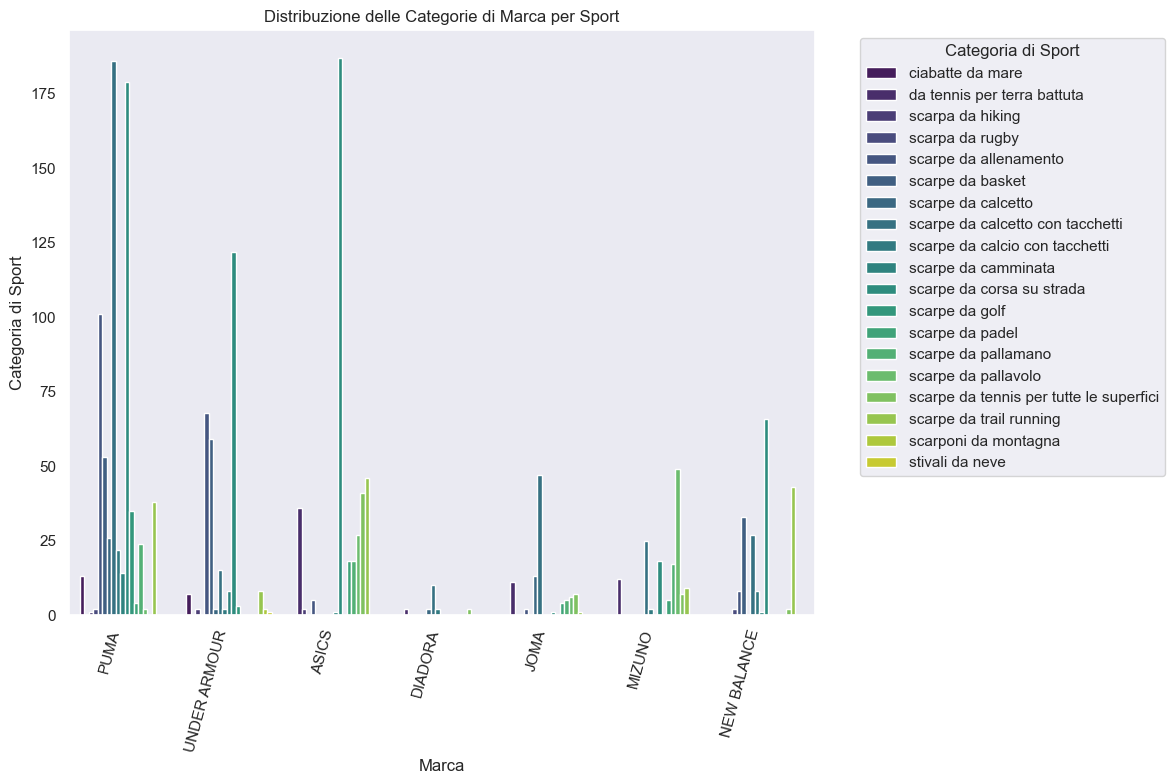

Categoria di scarpa offerta da ogni marca:
          marca                                              sport
0         ASICS  [scarpe da corsa su strada, scarpe da trail ru...
1       DIADORA  [scarpe da calcetto con tacchetti, scarpe da t...
2          JOMA  [scarpe da pallamano, scarpe da allenamento, s...
3        MIZUNO  [scarpe da pallavolo, scarpe da pallamano, sca...
4   NEW BALANCE  [scarpe da basket, scarpe da corsa su strada, ...
5          PUMA  [scarpe da allenamento, scarpe da basket, scar...
6  UNDER ARMOUR  [scarpe da allenamento, scarpe da corsa su str...

Categoria di scarpa offerta da ogni marca (formato leggibile):
Marca: ASICS
Sport: scarpe da corsa su strada, scarpe da trail running, da tennis per terra battuta, scarpe da tennis per tutte le superfici, scarpe da camminata, scarpa da hiking, scarpe da pallamano, scarpe da padel, scarpe da pallavolo, scarpe da allenamento
------------------------------
Marca: DIADORA
Sport: scarpe da calcetto con tacchetti, scarpe d

In [154]:
# 1. Grafico per vedere ogni marca quale categoria di sport rientra:

# Calcola il numero di modelli per ogni combinazione di marca e sport
num_prodotti = modello_unici.groupby(['sport', 'marca']).size().reset_index(name='num_prodotti')

# Crea il grafico a barre impilate
plt.figure(figsize=(12, 8))
sns.barplot(x='marca', y='num_prodotti', hue='sport', data=num_prodotti, palette='viridis')

# Aggiungi etichette e titolo
plt.xlabel('Marca')
plt.ylabel('Categoria di Sport')
plt.title('Distribuzione delle Categorie di Marca per Sport')
plt.xticks(rotation=75, ha='right')
plt.legend(title='Categoria di Sport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Codice per vedere ogni marca che sport ha:

# Trova gli sport unici per ogni marca
sport_per_marca = modello_unici.groupby('marca')['sport'].unique().reset_index()

# Stampa il risultato
print("Categoria di scarpa offerta da ogni marca:")
print(sport_per_marca)

# Vusualizzazione del risultato
print("\nCategoria di scarpa offerta da ogni marca (formato leggibile):")
for index, row in sport_per_marca.iterrows():
    print(f"Marca: {row['marca']}")
    print(f"Sport: {', '.join(row['sport'])}")
    print("-" * 30)


### Distribuzione dei prezzi per ogni brand e confronto con il brand MIZUNO

In [79]:
conteggio_sport_tutti = modello_unici.groupby(['marca', 'sport'])['sport'].value_counts().sort_values(ascending=False)
print("\nNumero di modelli per categoria di sport offerti dalle brand:")
print(conteggio_sport_tutti)

# Filtra il DataFrame per includere solo i dati di "MIZUNO"
mizuno_data = modello_unici[modello_unici['marca'] == 'MIZUNO']

# Ottieni le categorie di sport uniche offerte da "MIZUNO"
sport_mizuno = mizuno_data['sport'].unique()

# Stampa le categorie di sport
print(f"Categorie di sport offerte da MIZUNO: {sport_mizuno}")

# Se vuoi contare quanti modelli ha Mizuno per ogni sport:
conteggio_sport_mizuno = mizuno_data['sport'].value_counts()
print("\nNumero di modelli per categoria di sport offerti da MIZUNO:")
print(conteggio_sport_mizuno)


Numero di modelli per categoria di sport offerti dalle brand:
marca         sport                           
ASICS         scarpe da corsa su strada           187
PUMA          scarpe da calcetto con tacchetti    186
              scarpe da corsa su strada           179
UNDER ARMOUR  scarpe da corsa su strada           122
PUMA          scarpe da allenamento               101
                                                 ... 
JOMA          scarpe da corsa su strada             1
ASICS         scarpe da camminata                   1
JOMA          scarpe da trail running               1
PUMA          scarpa da hiking                      1
UNDER ARMOUR  stivali da neve                       1
Name: count, Length: 71, dtype: int64
Categorie di sport offerte da MIZUNO: ['scarpe da pallavolo' 'scarpe da pallamano'
 'scarpe da calcetto con tacchetti' 'da tennis per terra battuta'
 'scarpe da trail running' 'scarpe da corsa su strada'
 'scarpe da tennis per tutte le superfici' 'scarpe da 

In [81]:
# Facciamo un codice dove vedere la distribuzione dei prezzi medi per ogni sport e marca
distribuzione_prezzi = modello_unici.groupby(['sport', 'marca'])['prezzo_effettivo'].mean().unstack()
distribuzione_prezzi

marca,ASICS,DIADORA,JOMA,MIZUNO,NEW BALANCE,PUMA,UNDER ARMOUR
sport,,,,,,,
ciabatte da mare,NaN,NaN,NaN,NaN,NaN,31.153077,26.707143
da tennis per terra battuta,107.631111,79.99,77.562727,101.782500,NaN,NaN,NaN
scarpa da hiking,99.995000,NaN,NaN,NaN,NaN,82.950000,145.000000
scarpa da rugby,NaN,NaN,NaN,NaN,150.000000,85.000000,NaN
scarpe da allenamento,93.316000,NaN,69.700000,NaN,98.490000,71.537327,102.832647
scarpe da basket,NaN,NaN,NaN,NaN,85.687879,69.738302,101.381017
scarpe da calcetto,NaN,77.49,78.845385,NaN,NaN,65.806538,57.990000
scarpe da calcetto con tacchetti,NaN,103.17,50.188298,109.110000,128.295185,112.543656,129.366000
scarpe da calcio con tacchetti,NaN,214.46,NaN,198.495000,120.000000,122.888182,209.970000


### Analisi dei Prezzi Minimi, Massimi e Medi per la categoria Sport dal sito Zalando confronto al brand MIZUNO

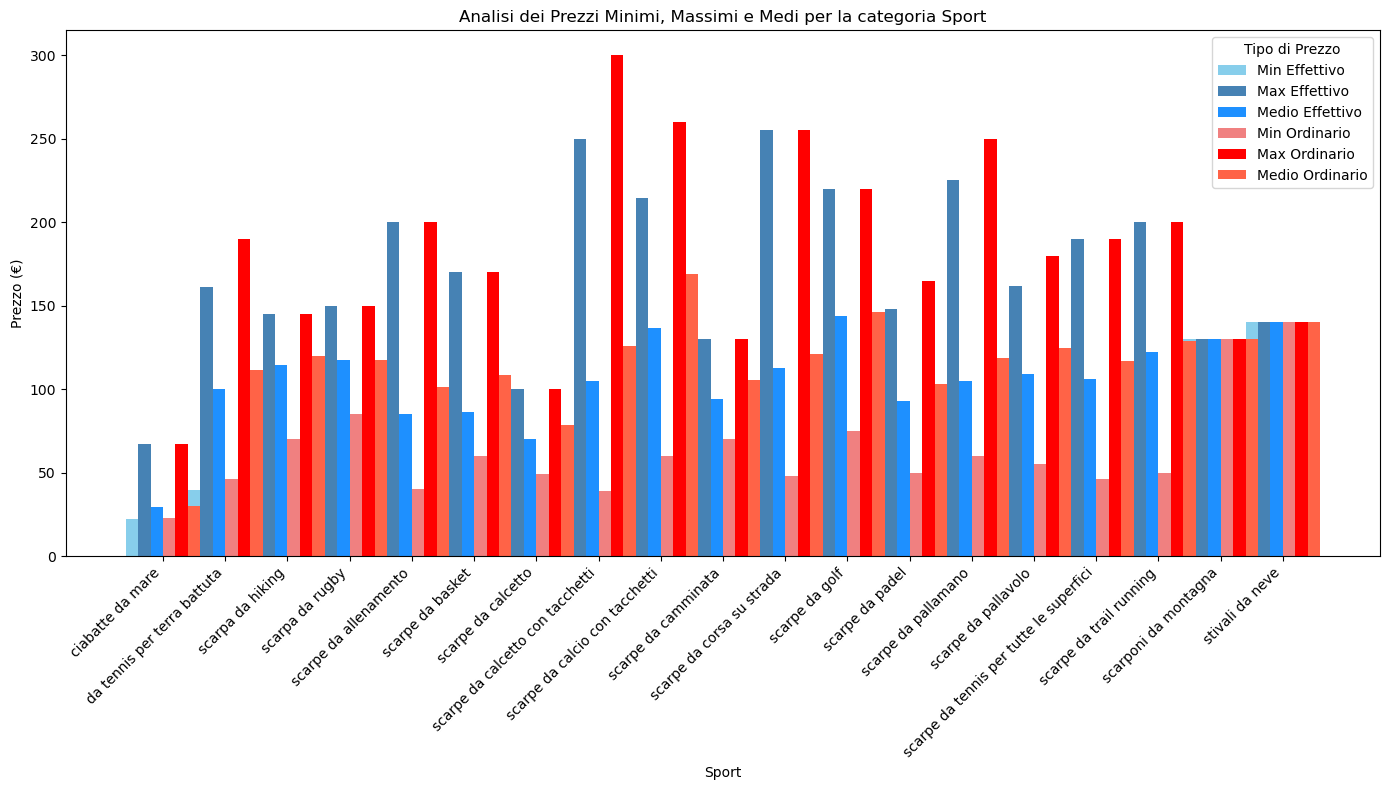

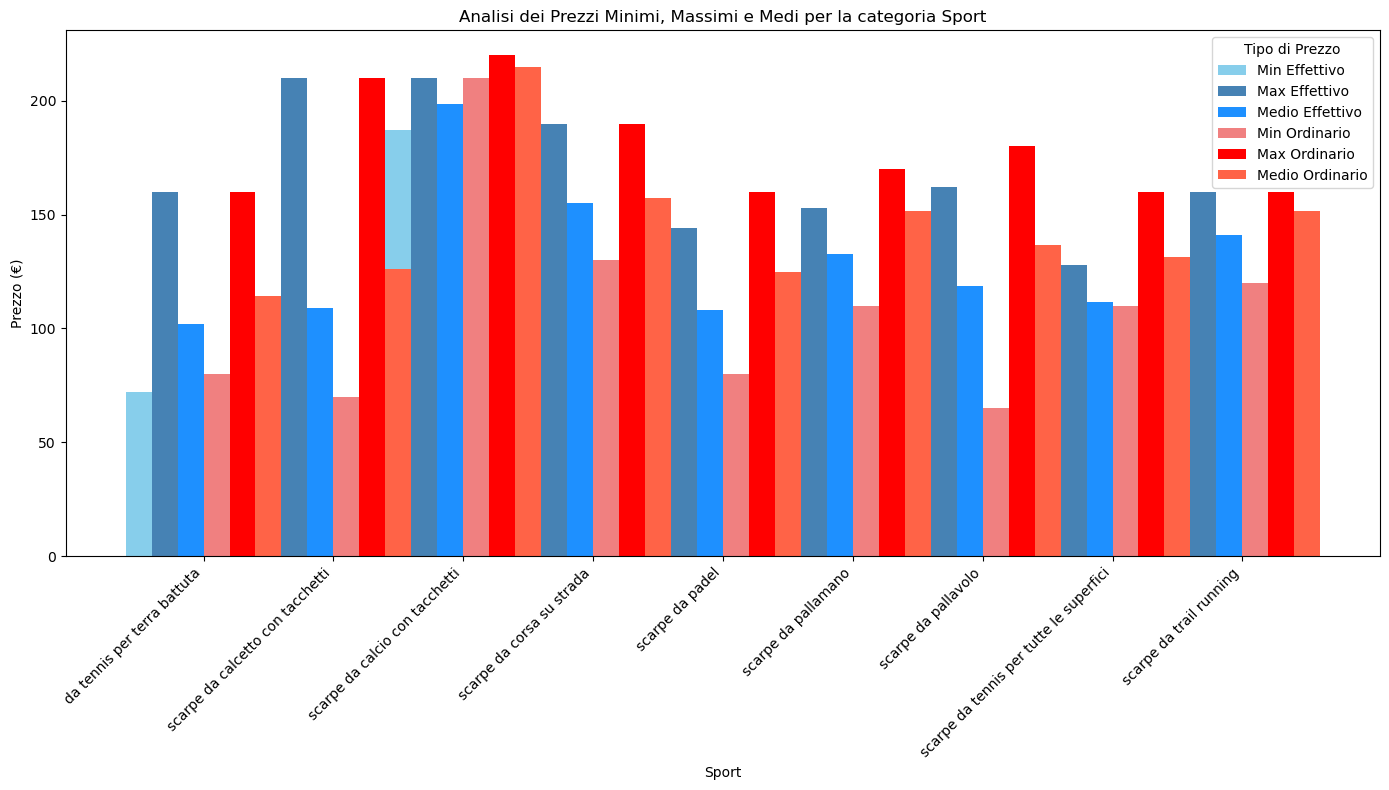

In [84]:
# Calcolo delle statistiche di prezzo per sport
prezzi_sport = modello_unici.groupby('sport').agg(
    prezzo_minimo_effettivo=('prezzo_effettivo', 'min'),
    prezzo_massimo_effettivo=('prezzo_effettivo', 'max'),
    prezzo_medio_effettivo=('prezzo_effettivo', 'mean'),
    prezzo_minimo_ordinario=('prezzo_ordinario', 'min'),
    prezzo_massimo_ordinario=('prezzo_ordinario', 'max'),
    prezzo_medio_ordinario=('prezzo_ordinario', 'mean')
).reset_index()

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(14, 8))

# Larghezza delle barre
bar_width = 0.2

# Posizioni delle barre per ciascuna statistica di prezzo
pos_min_eff = np.arange(len(prezzi_sport))
pos_max_eff = [p + bar_width for p in pos_min_eff]
pos_med_eff = [p + bar_width * 2 for p in pos_min_eff]
pos_min_ord = [p + bar_width * 3 for p in pos_min_eff]
pos_max_ord = [p + bar_width * 4 for p in pos_min_eff]
pos_med_ord = [p + bar_width * 5 for p in pos_min_eff]

# Creazione delle barre per il prezzo effettivo
plt.bar(pos_min_eff, prezzi_sport['prezzo_minimo_effettivo'], bar_width, label='Min Effettivo', color='skyblue')
plt.bar(pos_max_eff, prezzi_sport['prezzo_massimo_effettivo'], bar_width, label='Max Effettivo', color='steelblue')
plt.bar(pos_med_eff, prezzi_sport['prezzo_medio_effettivo'], bar_width, label='Medio Effettivo', color='dodgerblue')

# Creazione delle barre per il prezzo ordinario
plt.bar(pos_min_ord, prezzi_sport['prezzo_minimo_ordinario'], bar_width, label='Min Ordinario', color='lightcoral')
plt.bar(pos_max_ord, prezzi_sport['prezzo_massimo_ordinario'], bar_width, label='Max Ordinario', color='red')
plt.bar(pos_med_ord, prezzi_sport['prezzo_medio_ordinario'], bar_width, label='Medio Ordinario', color='tomato')

# Aggiunta di etichette e titolo
plt.xlabel('Sport')
plt.ylabel('Prezzo (€)')
plt.title('Analisi dei Prezzi Minimi, Massimi e Medi per la categoria Sport')
plt.xticks(pos_min_eff + bar_width * 2.5, prezzi_sport['sport'], rotation=45, ha='right')
plt.legend(title='Tipo di Prezzo')
plt.tight_layout()
plt.show()

mizuno_data = modello_unici[modello_unici['marca'] == 'MIZUNO']

# Calcolo delle statistiche di prezzo per sport
prezzi_sport_mizuno = mizuno_data.groupby('sport').agg(
    prezzo_minimo_effettivo_mizuno=('prezzo_effettivo', 'min'),
    prezzo_massimo_effettivo_mizuno=('prezzo_effettivo', 'max'),
    prezzo_medio_effettivo_mizuno=('prezzo_effettivo', 'mean'),
    prezzo_minimo_ordinario_mizuno=('prezzo_ordinario', 'min'),
    prezzo_massimo_ordinario_mizuno=('prezzo_ordinario', 'max'),
    prezzo_medio_ordinario_mizuno=('prezzo_ordinario', 'mean')
).reset_index()

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(14, 8))

# Larghezza delle barre
bar_width = 0.2

# Posizioni delle barre per ciascuna statistica di prezzo
pos_min_eff = np.arange(len(prezzi_sport_mizuno))
pos_max_eff = [p + bar_width for p in pos_min_eff]
pos_med_eff = [p + bar_width * 2 for p in pos_min_eff]
pos_min_ord = [p + bar_width * 3 for p in pos_min_eff]
pos_max_ord = [p + bar_width * 4 for p in pos_min_eff]
pos_med_ord = [p + bar_width * 5 for p in pos_min_eff]

# Creazione delle barre per il prezzo effettivo
plt.bar(pos_min_eff, prezzi_sport_mizuno['prezzo_minimo_effettivo_mizuno'], bar_width, label='Min Effettivo', color='skyblue')
plt.bar(pos_max_eff, prezzi_sport_mizuno['prezzo_massimo_effettivo_mizuno'], bar_width, label='Max Effettivo', color='steelblue')
plt.bar(pos_med_eff, prezzi_sport_mizuno['prezzo_medio_effettivo_mizuno'], bar_width, label='Medio Effettivo', color='dodgerblue')

# Creazione delle barre per il prezzo ordinario
plt.bar(pos_min_ord, prezzi_sport_mizuno['prezzo_minimo_ordinario_mizuno'], bar_width, label='Min Ordinario', color='lightcoral')
plt.bar(pos_max_ord, prezzi_sport_mizuno['prezzo_massimo_ordinario_mizuno'], bar_width, label='Max Ordinario', color='red')
plt.bar(pos_med_ord, prezzi_sport_mizuno['prezzo_medio_ordinario_mizuno'], bar_width, label='Medio Ordinario', color='tomato')

# Aggiunta di etichette e titolo
plt.xlabel('Sport')
plt.ylabel('Prezzo (€)')
plt.title('Analisi dei Prezzi Minimi, Massimi e Medi per la categoria Sport')
plt.xticks(pos_min_eff + bar_width * 2.5, prezzi_sport_mizuno['sport'], rotation=45, ha='right')
plt.legend(title='Tipo di Prezzo')
plt.tight_layout()
plt.show()

### Distribuzione del numero di prodotti per categoria di sport per vedere quali categorie sono piu presenti sul sito Zalando

In [87]:
# conteggio dei prodotti per categoria
conteggio = modello_unici.groupby('sport')['nome_prodotto'].count()
conteggio

sport
ciabatte da mare                            20
da tennis per terra battuta                 61
scarpa da hiking                             5
scarpa da rugby                              4
scarpe da allenamento                      184
scarpe da basket                           145
scarpe da calcetto                          43
scarpe da calcetto con tacchetti           310
scarpe da calcio con tacchetti              36
scarpe da camminata                         24
scarpe da corsa su strada                  573
scarpe da golf                              38
scarpe da padel                             31
scarpe da pallamano                         64
scarpe da pallavolo                         84
scarpe da tennis per tutte le superfici     59
scarpe da trail running                    145
scarponi da montagna                         2
stivali da neve                              1
Name: nome_prodotto, dtype: int64

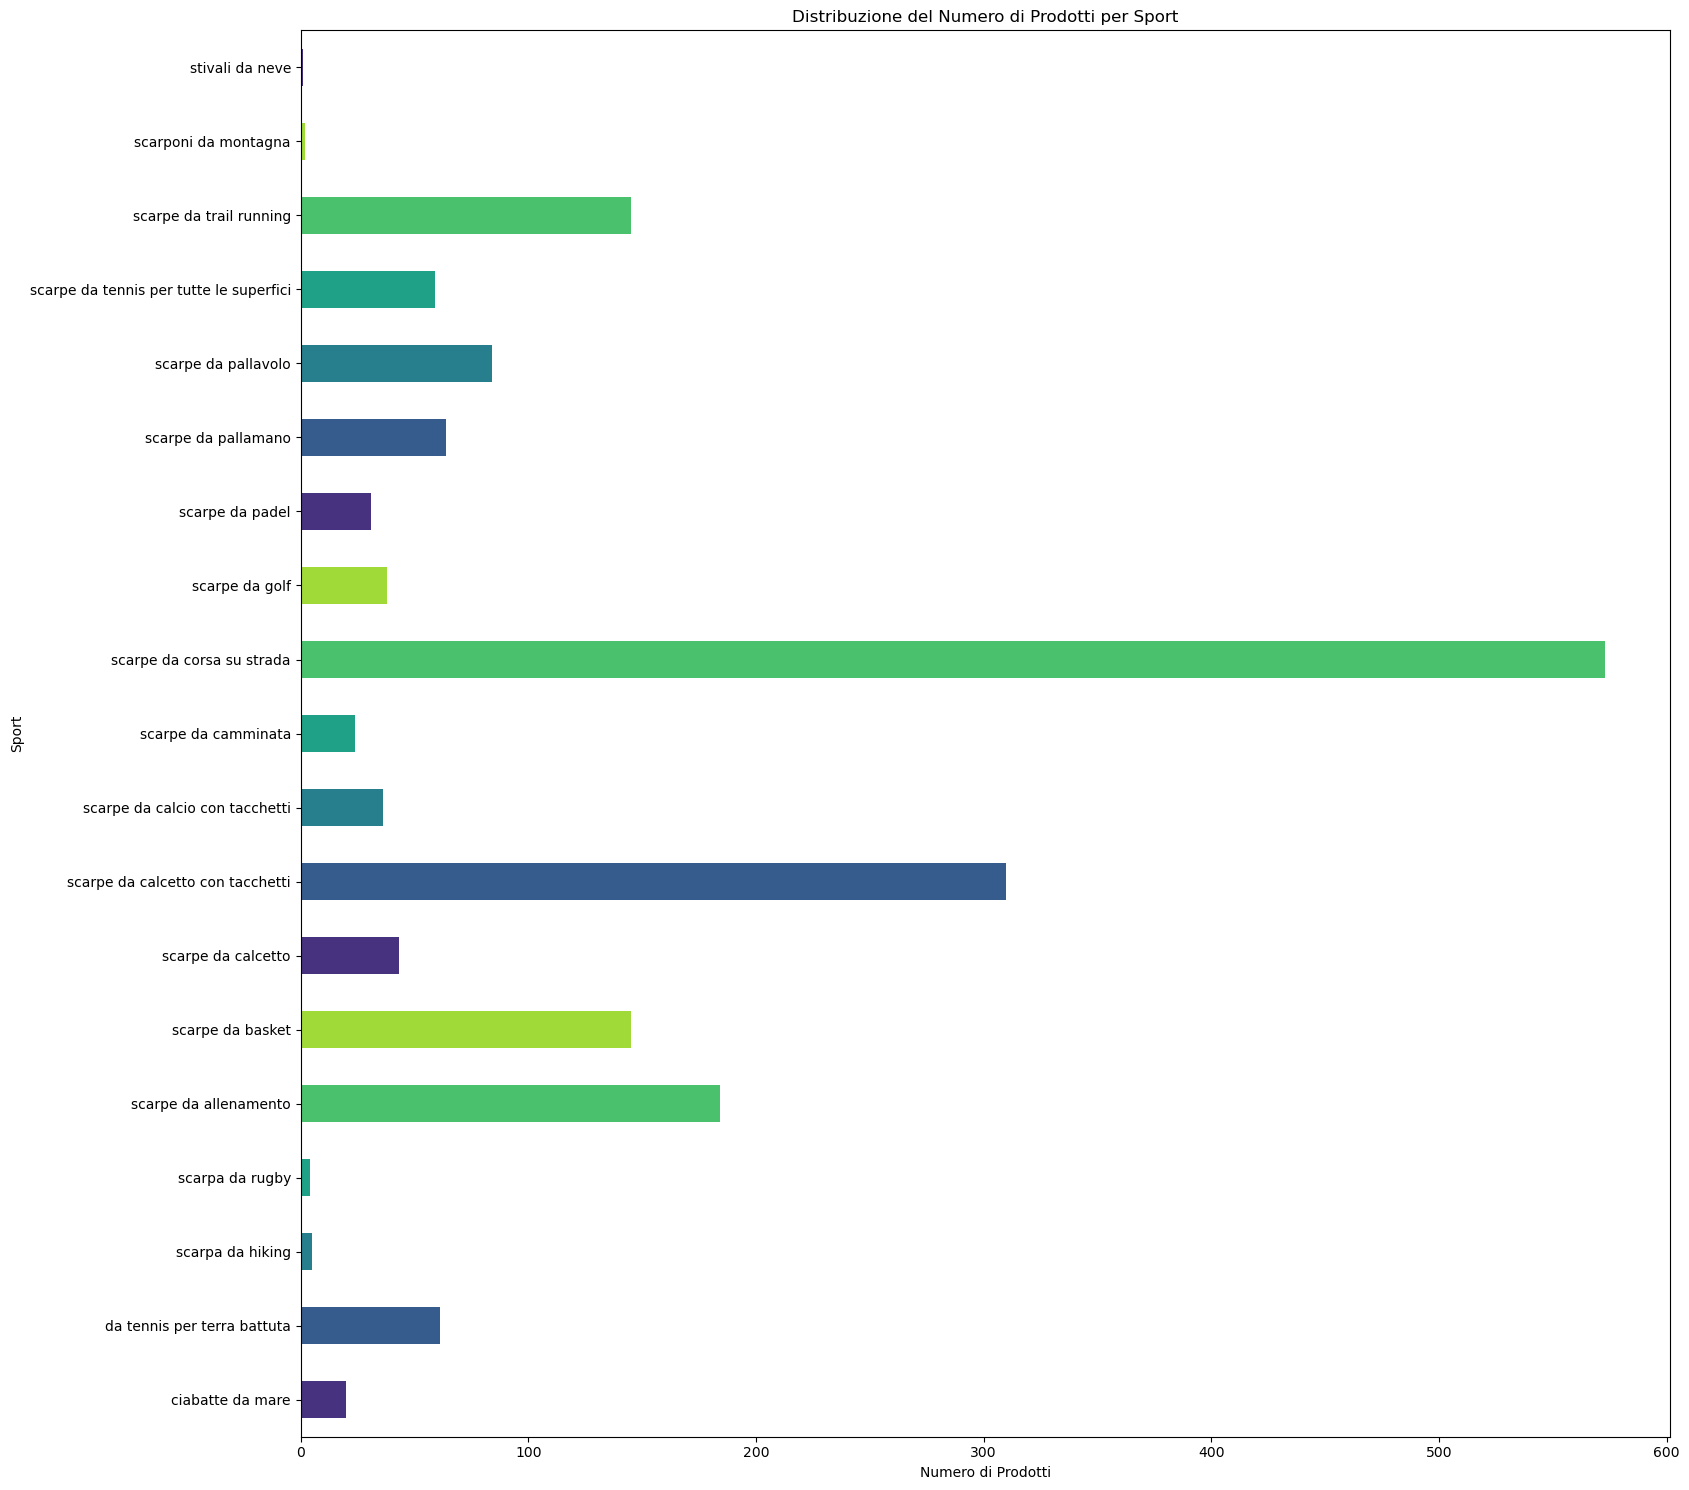

In [89]:
# Creazione del grafico a barre orizzontali
plt.figure(figsize=(17, 15))
conteggio.plot(kind='barh', color=sns.color_palette('viridis'))

# Aggiunta di etichette e titolo
plt.xlabel('Numero di Prodotti')
plt.ylabel('Sport')
plt.title('Distribuzione del Numero di Prodotti per Sport')

# Mostra il grafico
plt.tight_layout()
plt.show()

### Distribuzione dei prezzi per Categoria Sport in maniera tale che possiamo visualizzare e identificare eventuale categorie di Sport con prezzi variabili
### Abbiamo scelto di utilizzare un boxplot

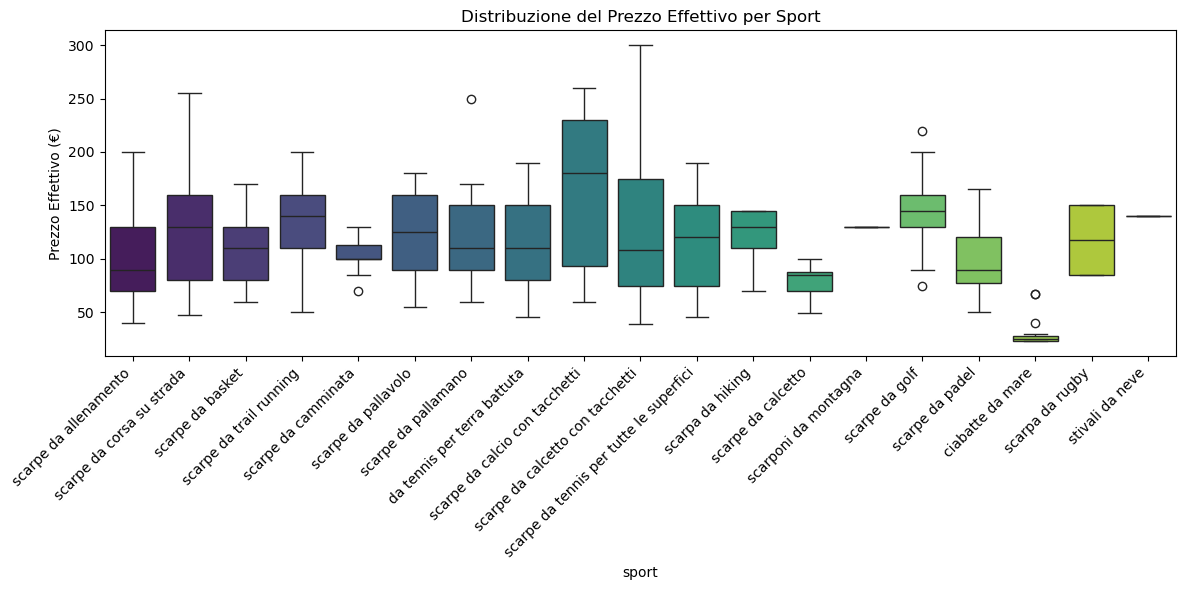

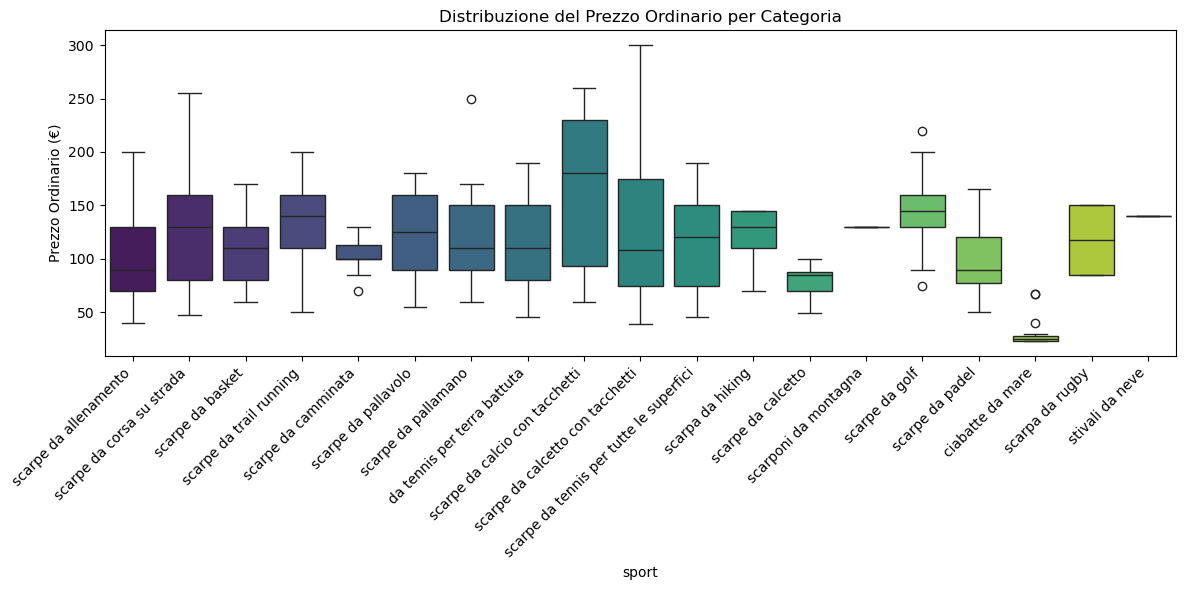

In [91]:
# Creazione del box plot per il prezzo effettivo per categoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='prezzo_ordinario', data=modello_unici, palette='viridis', hue='sport', legend=False)

# Aggiunta di etichette e titolo
plt.xlabel('sport')
plt.ylabel('Prezzo Effettivo (€)')
plt.title('Distribuzione del Prezzo Effettivo per Sport')
plt.xticks(rotation=45, ha='right') # Ruota le etichette sull'asse x per leggibilità
plt.tight_layout()
plt.show()

# Creazione del box plot per il prezzo ordinario per categoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='prezzo_ordinario', data=modello_unici, palette='viridis', hue='sport', legend=False)

# Aggiunta di etichette e titolo
plt.xlabel('sport')
plt.ylabel('Prezzo Ordinario (€)')
plt.title('Distribuzione del Prezzo Ordinario per Categoria')
plt.xticks(rotation=45, ha='right') # Ruota le etichette sull'asse x per leggibilità
plt.tight_layout()
plt.show()



### Analisi dei prezzi per comprendere la distribuzione generale dei prezzi di tutti i prodotti. 
### La scelta e di utilizzare un istogramma che e ottima per visualizzare i dati sui prezzi

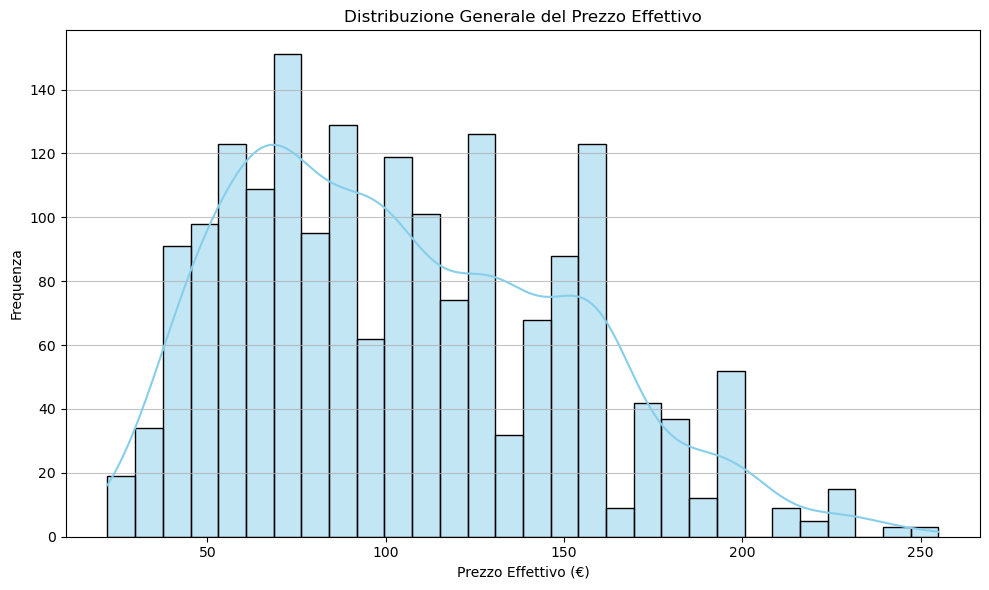

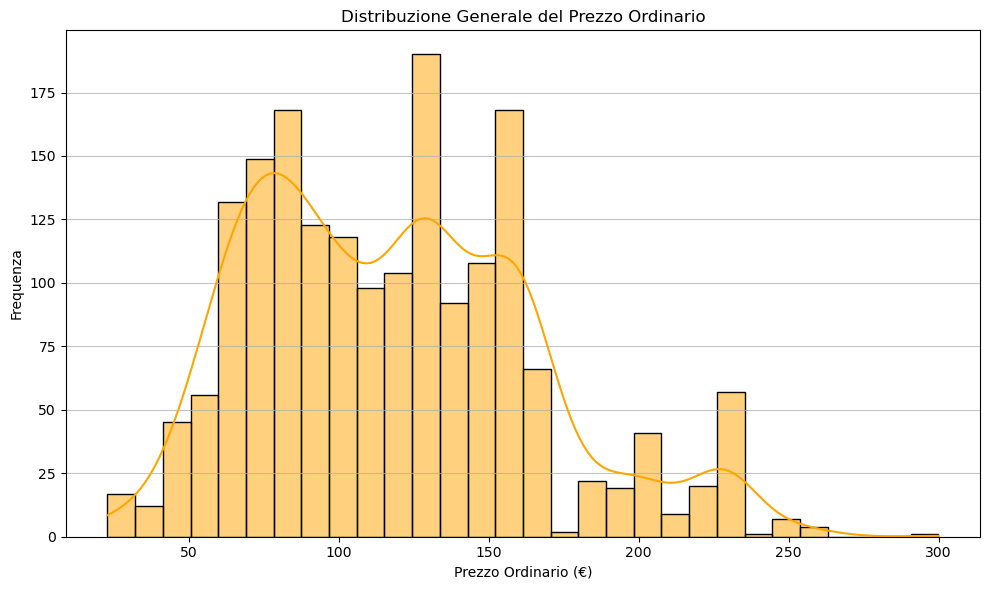

In [94]:
# Creazione dell'istogramma per il prezzo effettivo
plt.figure(figsize=(10, 6))
sns.histplot(modello_unici['prezzo_effettivo'], bins=30, kde=True, color='skyblue')

# Aggiunta di etichette e titolo
plt.xlabel('Prezzo Effettivo (€)')
plt.ylabel('Frequenza')
plt.title('Distribuzione Generale del Prezzo Effettivo')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Creazione dell'istogramma per il prezzo ordinario
plt.figure(figsize=(10, 6))
sns.histplot(modello_unici['prezzo_ordinario'], bins=30, kde=True, color='orange')

# Aggiunta di etichette e titolo
plt.xlabel('Prezzo Ordinario (€)')
plt.ylabel('Frequenza') # il numero di prodotti che hanno un prezzo all'interno di quell'intervallo
plt.title('Distribuzione Generale del Prezzo Ordinario')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

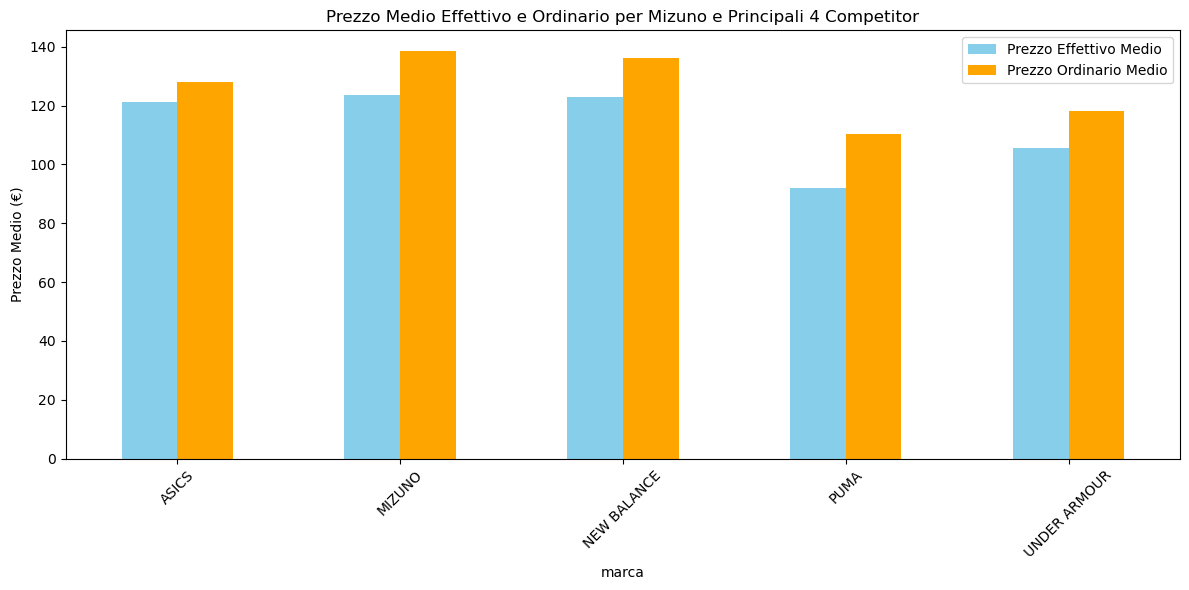

In [95]:
brand = 'MIZUNO'

# Identifica i principali 4 competitor in base al numero di modelli offerti
modelli_per_marca = modello_unici['marca'].value_counts().drop(brand, errors='ignore')
top_4_competitori = modelli_per_marca.nlargest(4).index.tolist()

# Lista delle marche da analizzare
marche_da_analizzare = [brand] + top_4_competitori

# Filtra il DataFrame per le marche selezionate
df_marche = modello_unici[modello_unici['marca'].isin(marche_da_analizzare)]

# Calcola il prezzo medio effettivo e ordinario per ogni marca
prezzi_medi_per_marca = df_marche.groupby('marca').agg(
    prezzo_effettivo_medio=('prezzo_effettivo', 'mean'),
    prezzo_ordinario_medio=('prezzo_ordinario', 'mean')
).reset_index()

# Imposta la marca come indice per facilitare il plotting
prezzi_medi_per_marca = prezzi_medi_per_marca.set_index('marca')

# Crea il grafico a barre affiancate
ax = prezzi_medi_per_marca[['prezzo_effettivo_medio', 'prezzo_ordinario_medio']].plot(
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'orange'],
    rot=45
)

# Aggiungi etichette e titolo
plt.ylabel('Prezzo Medio (€)')
plt.title('Prezzo Medio Effettivo e Ordinario per Mizuno e Principali 4 Competitor')
plt.legend(['Prezzo Effettivo Medio', 'Prezzo Ordinario Medio'])
plt.tight_layout()
plt.show()

### Analisi dei prezzi Minimi, Massimi e Medi per Modello con l'aiuto di un grafico a barre raggruppante per poter visualizzare le differenze e le tendenze dei prezzi tra i diversi modelli

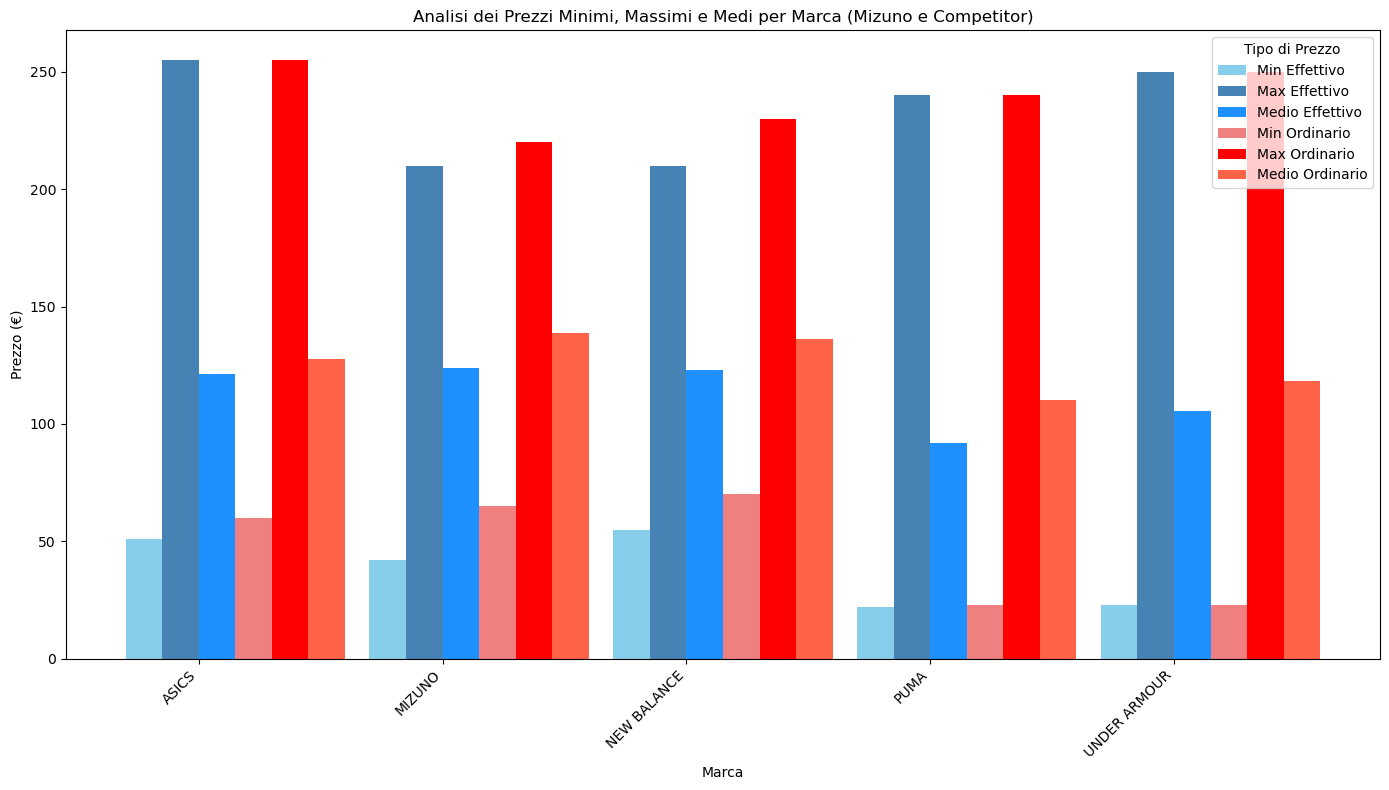

In [98]:
brand = 'MIZUNO'

# Identifica i principali 4 competitor in base al numero di modelli offerti
modelli_per_marca = modello_unici['marca'].value_counts().drop(brand, errors='ignore')
top_4_competitori = modelli_per_marca.nlargest(4).index.tolist()

# Lista delle marche da analizzare
marche_da_analizzare = [brand] + top_4_competitori

# Filtra il DataFrame per le marche selezionate
df_marche = modello_unici[modello_unici['marca'].isin(marche_da_analizzare)]

# Calcolo delle statistiche di prezzo per marca
prezzi_marca = df_marche.groupby('marca').agg(
    prezzo_minimo_effettivo=('prezzo_effettivo', 'min'),
    prezzo_massimo_effettivo=('prezzo_effettivo', 'max'),
    prezzo_medio_effettivo=('prezzo_effettivo', 'mean'),
    prezzo_minimo_ordinario=('prezzo_ordinario', 'min'),
    prezzo_massimo_ordinario=('prezzo_ordinario', 'max'),
    prezzo_medio_ordinario=('prezzo_ordinario', 'mean')
).reset_index()

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(14, 8))

# Larghezza delle barre
bar_width = 0.15

# Posizioni delle barre per ciascuna statistica di prezzo
pos_marca = np.arange(len(prezzi_marca))
pos_min_eff = [p - bar_width * 1.5 for p in pos_marca]
pos_max_eff = [p - bar_width * 0.5 for p in pos_marca]
pos_med_eff = [p + bar_width * 0.5 for p in pos_marca]
pos_min_ord = [p + bar_width * 1.5 for p in pos_marca]
pos_max_ord = [p + bar_width * 2.5 for p in pos_marca]
pos_med_ord = [p + bar_width * 3.5 for p in pos_marca]

# Creazione delle barre per il prezzo effettivo
plt.bar(pos_min_eff, prezzi_marca['prezzo_minimo_effettivo'], bar_width, label='Min Effettivo', color='skyblue')
plt.bar(pos_max_eff, prezzi_marca['prezzo_massimo_effettivo'], bar_width, label='Max Effettivo', color='steelblue')
plt.bar(pos_med_eff, prezzi_marca['prezzo_medio_effettivo'], bar_width, label='Medio Effettivo', color='dodgerblue')

# Creazione delle barre per il prezzo ordinario
plt.bar(pos_min_ord, prezzi_marca['prezzo_minimo_ordinario'], bar_width, label='Min Ordinario', color='lightcoral')
plt.bar(pos_max_ord, prezzi_marca['prezzo_massimo_ordinario'], bar_width, label='Max Ordinario', color='red')
plt.bar(pos_med_ord, prezzi_marca['prezzo_medio_ordinario'], bar_width, label='Medio Ordinario', color='tomato')

# Aggiunta di etichette e titolo
plt.xlabel('Marca')
plt.ylabel('Prezzo (€)')
plt.title('Analisi dei Prezzi Minimi, Massimi e Medi per Marca (Mizuno e Competitor)')
plt.xticks(pos_marca, prezzi_marca['marca'], rotation=45, ha='right')
plt.legend(title='Tipo di Prezzo')
plt.tight_layout()
plt.show()


Prezzi Effettivi Medi per Categoria Sport:
sport
scarpe da golf                             143.599737
stivali da neve                            140.000000
scarpe da calcio con tacchetti             136.371944
scarponi da montagna                       130.000000
scarpe da trail running                    122.522828
scarpa da rugby                            117.500000
scarpa da hiking                           114.588000
scarpe da corsa su strada                  112.583368
scarpe da pallavolo                        109.157024
scarpe da tennis per tutte le superfici    105.906102
scarpe da pallamano                        105.071094
scarpe da calcetto con tacchetti           104.696387
da tennis per terra battuta                100.152131
scarpe da camminata                         94.356667
scarpe da padel                             92.958065
scarpe da basket                            86.243517
scarpe da allenamento                       84.846685
scarpe da calcetto              

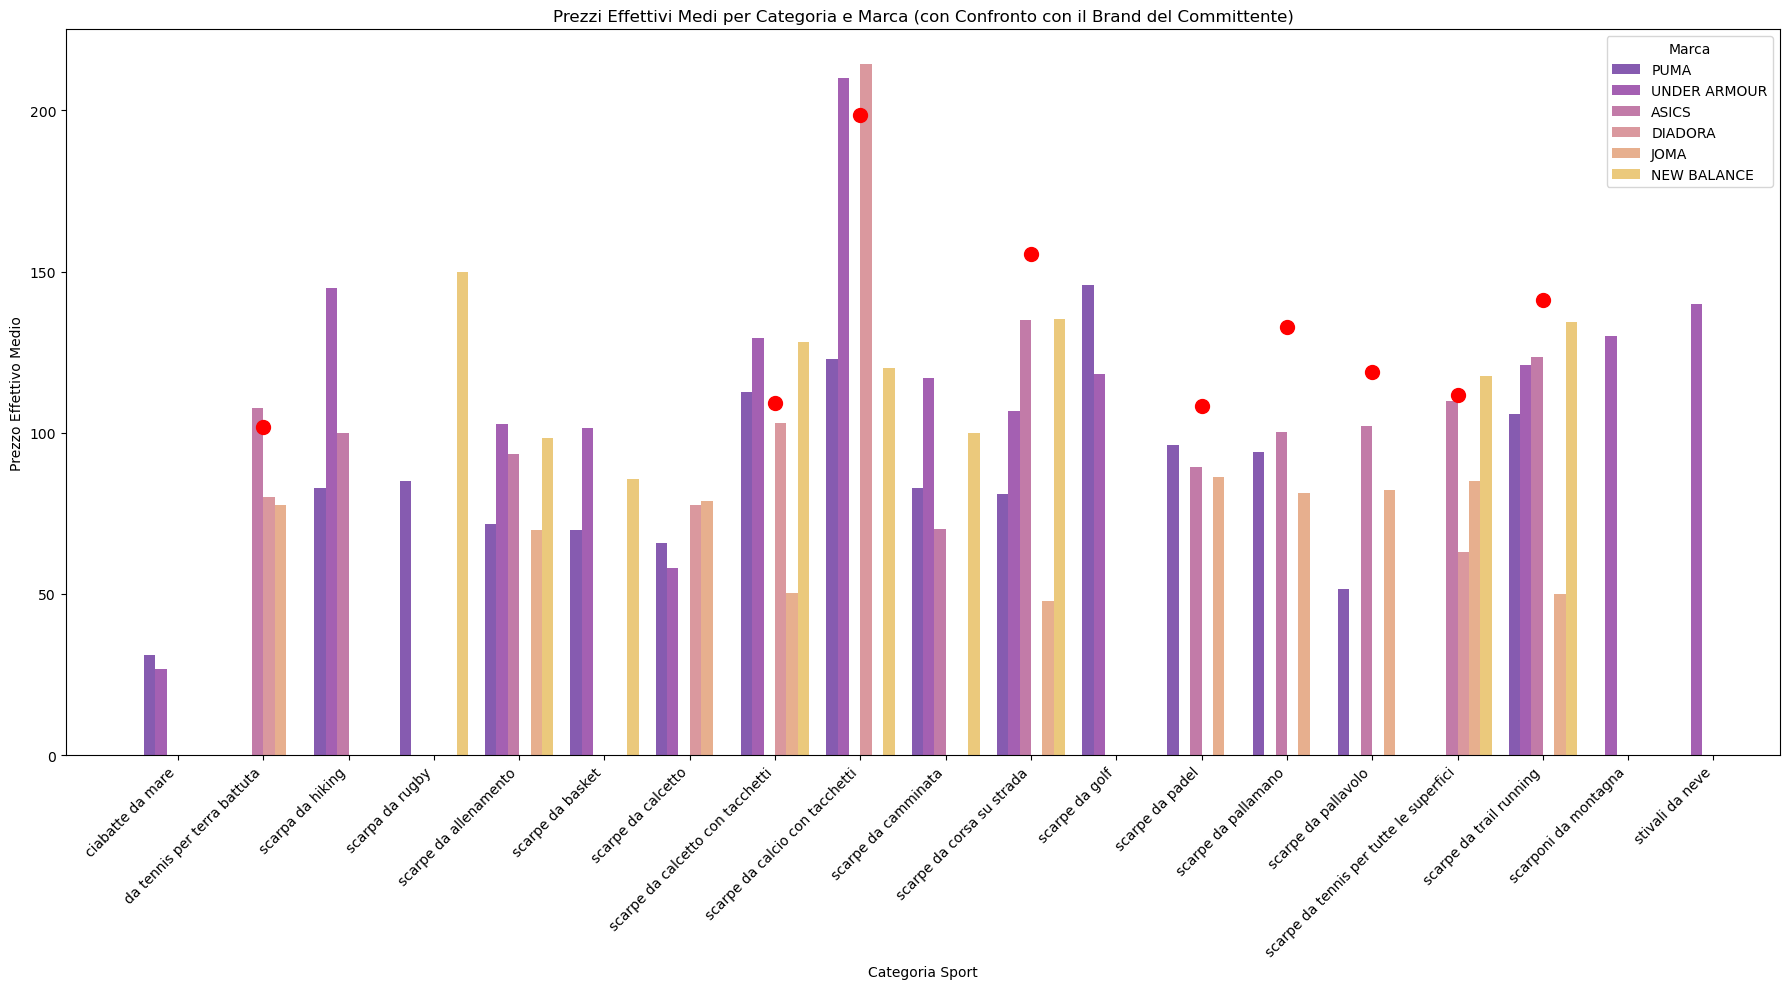


Range di Prezzo Effettivo per Categoria:
                                     sport  prezzo_effettivo
0              da tennis per terra battuta        101.782500
1         scarpe da calcetto con tacchetti        109.110000
2           scarpe da calcio con tacchetti        198.495000
3                scarpe da corsa su strada        155.323333
4                          scarpe da padel        108.190000
5                      scarpe da pallamano        132.686471
6                      scarpe da pallavolo        118.787959
7  scarpe da tennis per tutte le superfici        111.627143
8                  scarpe da trail running        141.067778


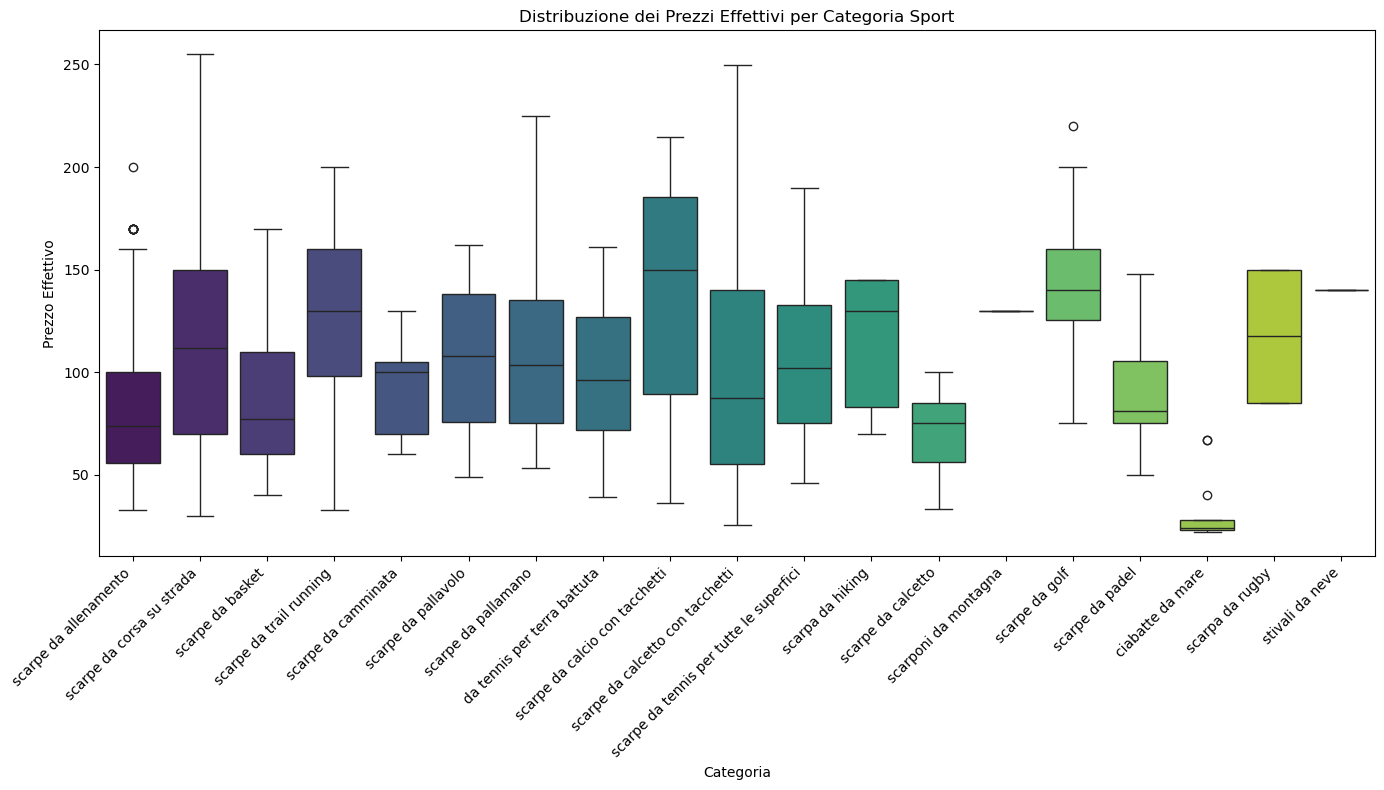

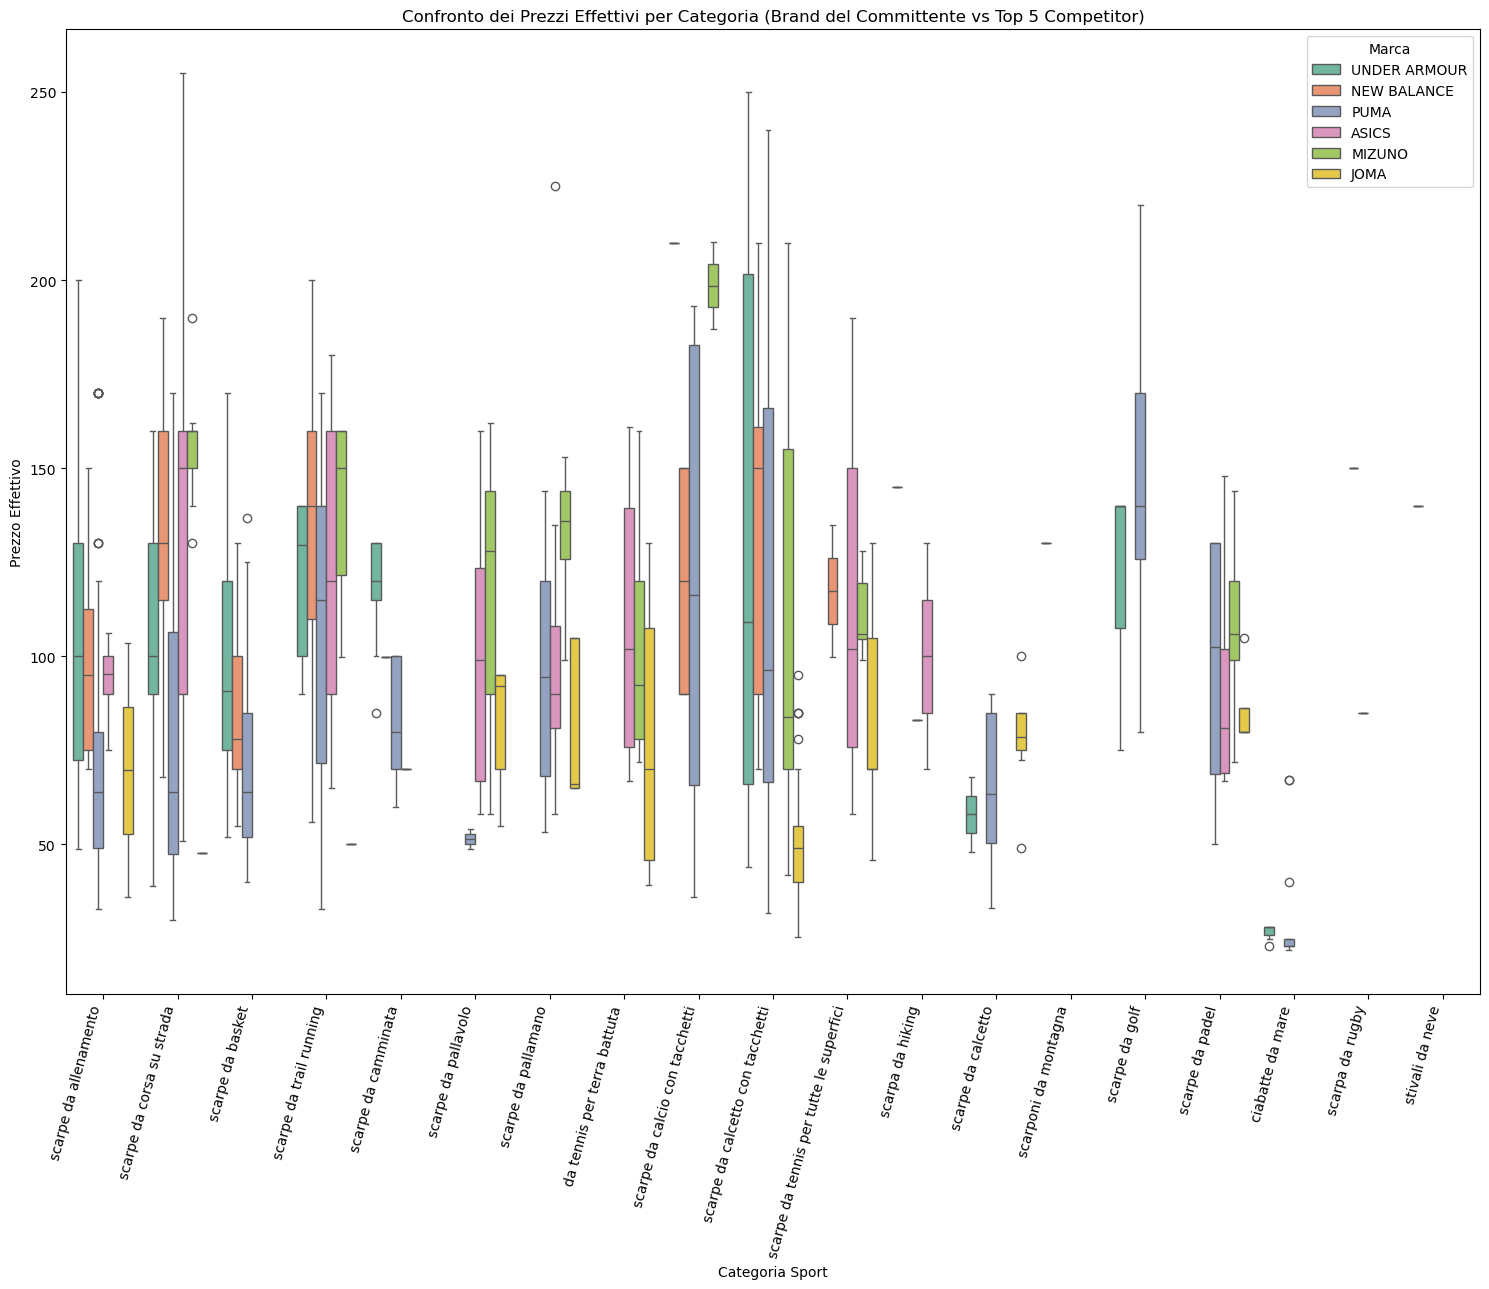

In [102]:
# Prezzi Medi per Categoria
pmc = modello_unici.groupby('sport')['prezzo_effettivo'].mean().sort_values(ascending=False) #prezzo medio per categoria sport
print("\nPrezzi Effettivi Medi per Categoria Sport:")
print(pmc)

# Nome del brand del committente (assicurati che corrisponda esattamente ai dati)
brand = 'MIZUNO'

# 1. Calcola i prezzi medi per categoria e marca (escluso MIZUNO)
pmcb = modello_unici[modello_unici['marca'] != brand].groupby(['sport', 'marca'])['prezzo_effettivo'].mean().reset_index()

# 2. Filtra i dati per il brand del committente
pmM = modello_unici[modello_unici['marca'] == brand].groupby(['sport'])['prezzo_effettivo'].mean().reset_index()

# 3. Visualizzazione Prezzi Medi per Categoria e Marca (confronto)
plt.figure(figsize=(18, 10))
sns.barplot(x='sport', y='prezzo_effettivo', hue='marca', data=pmcb, palette="plasma", alpha=0.7)

# 4. Aggiungi i punti rossi per il brand del committente
if not pmM.empty:
    for index, row in pmM.iterrows():
        plt.scatter(row['sport'], row['prezzo_effettivo'], color='red', marker='o', s=100)

plt.title('Prezzi Effettivi Medi per Categoria e Marca (con Confronto con il Brand del Committente)')
plt.xlabel('Categoria Sport')
plt.ylabel('Prezzo Effettivo Medio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Marca')
plt.tight_layout()
plt.show()

# Range di Prezzo per Categoria
pmms = modello_unici.groupby('sport')['prezzo_effettivo'].agg(['min', 'max']) #prezzo minimo massimo per categoria sport
print("\nRange di Prezzo Effettivo per Categoria:")
print(pmM)

# Visualizzazione con Boxplot per confrontare le distribuzioni
plt.figure(figsize=(14, 8))
sns.boxplot(x='sport', y='prezzo_effettivo', data=modello_unici, hue='sport', palette="viridis", legend=False)
plt.title('Distribuzione dei Prezzi Effettivi per Categoria Sport')
plt.xlabel('Categoria')
plt.ylabel('Prezzo Effettivo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Confronto Diretto con il Brand del Committente (prezzi per categoria)
plt.figure(figsize=(15, 13))
sns.boxplot(x='sport', y='prezzo_effettivo', hue='marca', data=modello_unici[modello_unici['marca'].isin(['MIZUNO'] + list(modelli_per_marca.nlargest(5).index))], palette="Set2")
plt.title(f'Confronto dei Prezzi Effettivi per Categoria (Brand del Committente vs Top 5 Competitor)')
plt.xlabel('Categoria Sport')
plt.ylabel('Prezzo Effettivo')
plt.xticks(rotation=75, ha='right')
plt.legend(title='Marca')
plt.tight_layout()
plt.show()

Text(70.7222222222222, 0.5, 'Categoria Sport')

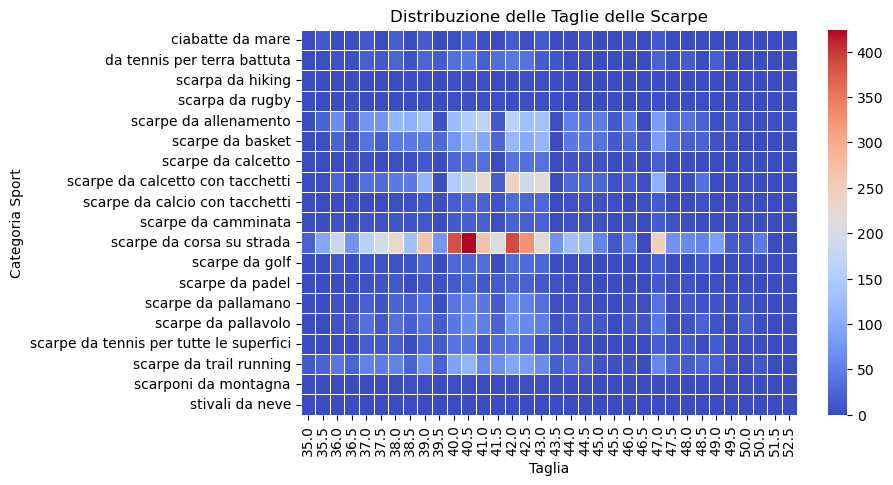

In [104]:
pivot_table = df_esteso.pivot_table(index="sport", columns="taglia", aggfunc="size", fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)

#Etichette
plt.title("Distribuzione delle Taglie delle Scarpe")
plt.xlabel("Taglia")
plt.ylabel("Categoria Sport")

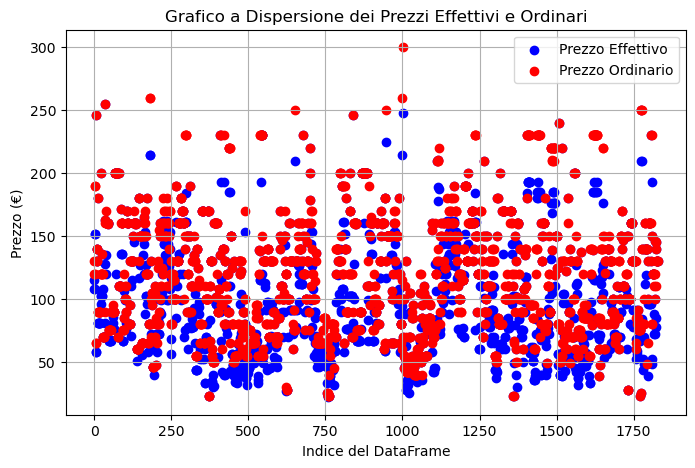

In [94]:
# Crea il grafico a dispersione
plt.figure(figsize=(8, 5))

# Grafico a dispersione per il prezzo effettivo (colore blu)
plt.scatter(modello_unici.index, modello_unici['prezzo_effettivo'], label='Prezzo Effettivo', color='blue')

# Grafico a dispersione per il prezzo ordinario (colore rosso)
plt.scatter(modello_unici.index, modello_unici['prezzo_ordinario'], label='Prezzo Ordinario', color='red')

# Aggiungi etichette e titolo
plt.title('Grafico a Dispersione dei Prezzi Effettivi e Ordinari')
plt.xlabel('Indice del DataFrame')  
plt.ylabel('Prezzo (€)')
plt.legend()  # Mostra la legenda per distinguere i colori
plt.grid(True)
plt.show()

In [144]:
# i primi 5 con piu quantita di prodotti in vendita
nb_shoes = df_esteso['marca'].value_counts().nlargest(5)
nb_shoes


marca
PUMA            5673
ASICS           3179
UNDER ARMOUR    2295
NEW BALANCE     1489
MIZUNO          1089
Name: count, dtype: int64

In [150]:
# i primi 5 con i prezzi di vendita piu alti
price_shoes = modello_unici.groupby('marca')['prezzo_ordinario'].max().nlargest(5)
price_shoes

marca
DIADORA         299.95
ASICS           255.00
UNDER ARMOUR    249.99
PUMA            240.00
NEW BALANCE     230.00
Name: prezzo_ordinario, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\566180189.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


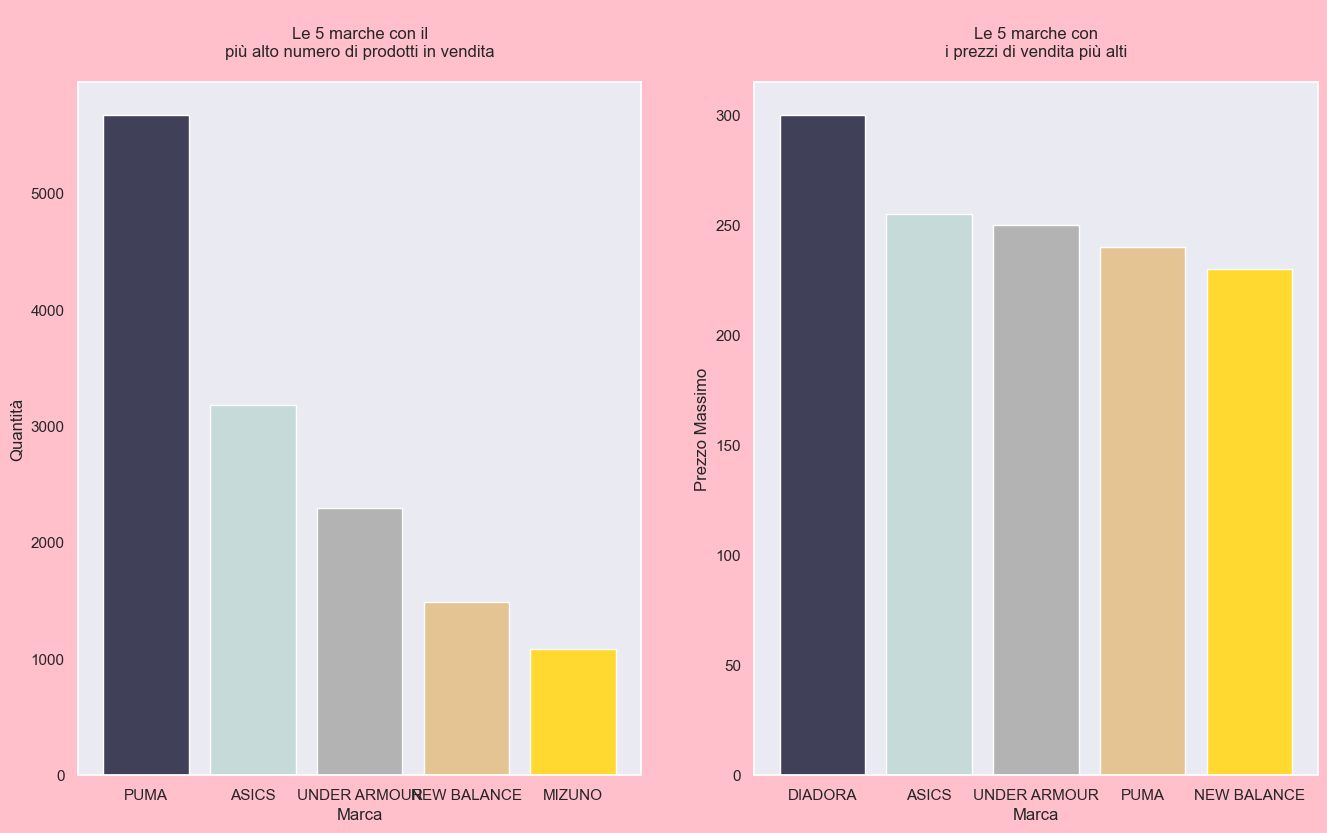

In [152]:
#Definiamo i colori
c_1, c_2 = sns.color_palette('bone')[1], sns.color_palette('bone', 5)[-1]
c_3, c_4 = sns.color_palette('Set2')[-1], sns.color_palette('Set2')[-2]
c_5 = sns.color_palette('Set2')[-3]
colors = [c_1, c_2, c_3, c_4, c_5]
#Crea il graffico
sns.set_theme(style='dark')
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
#Grafico per i prezzi di vendita più alti
ax1.bar(data=nb_shoes, x=nb_shoes.index, height=nb_shoes.values, color=colors)
ax1.set_ylabel('Quantità')
ax1.set_xlabel('Marca')
ax1.set_title('\nLe 5 marche con il\npiù alto numero di prodotti in vendita\n')
# Grafico per i prezzi di vendita più alti
ax2.bar(data=price_shoes, x=price_shoes.index, height=price_shoes.values, color=colors)
ax2.set_title('\nLe 5 marche con\ni prezzi di vendita più alti\n')
ax2.set_ylabel('Prezzo Massimo')
ax2.set_xlabel('Marca')
#Imposta il colore di sfondo della figura
fig.set_facecolor(color='#FFC0CB')
# mostra il graffico
fig.show()

In [156]:
modello_unici


,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,modello,sport,colori_split,numero_taglie
798,unisex,UNDER ARMOUR,reign lifter unisex - scarpe da allenamento - ...,199.99,199.99,reign lifter unisex,scarpe da allenamento,black/white,22
579,donna,UNDER ARMOUR,apparition - scarpe da allenamento - white/cas...,90.99,129.99,apparition,scarpe da allenamento,white/castlerock/ares red,19
676,donna,UNDER ARMOUR,scarpe da corsa su strada - white,130.00,130.00,unknown,scarpe da corsa su strada,white,19
711,unisex,NEW BALANCE,480 unisex - scarpe da basket - dark mushroom,99.99,99.99,480 unisex,scarpe da basket,dark mushroom,19
741,unisex,PUMA,cell thrill unisex - scarpe da allenamento - b...,64.99,64.99,cell thrill unisex,scarpe da allenamento,black black,19
...,...,...,...,...,...,...,...,...,...
1633,uomo,PUMA,ultra match fg/ag - scarpe da calcetto con tac...,71.37,84.95,ultra match fg/ag,scarpe da calcetto con tacchetti,black/asphalt,1
1324,uomo,PUMA,deviate nitro - scarpe da corsa su strada - bl...,170.00,170.00,deviate nitro,scarpe da corsa su strada,black sun stream,1
1641,uomo,PUMA,ultra match mg - scarpe da calcetto con tacche...,47.50,47.50,ultra match mg,scarpe da calcetto con tacchetti,poison pink/white/black,1
1642,uomo,PUMA,ultra match tt - scarpe da calcetto con tacche...,71.37,84.95,ultra match tt,scarpe da calcetto con tacchetti,black/asphalt,1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\427708114.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=analisa, x='marca', y='prezzo_effettivo', palette=my_pltt)


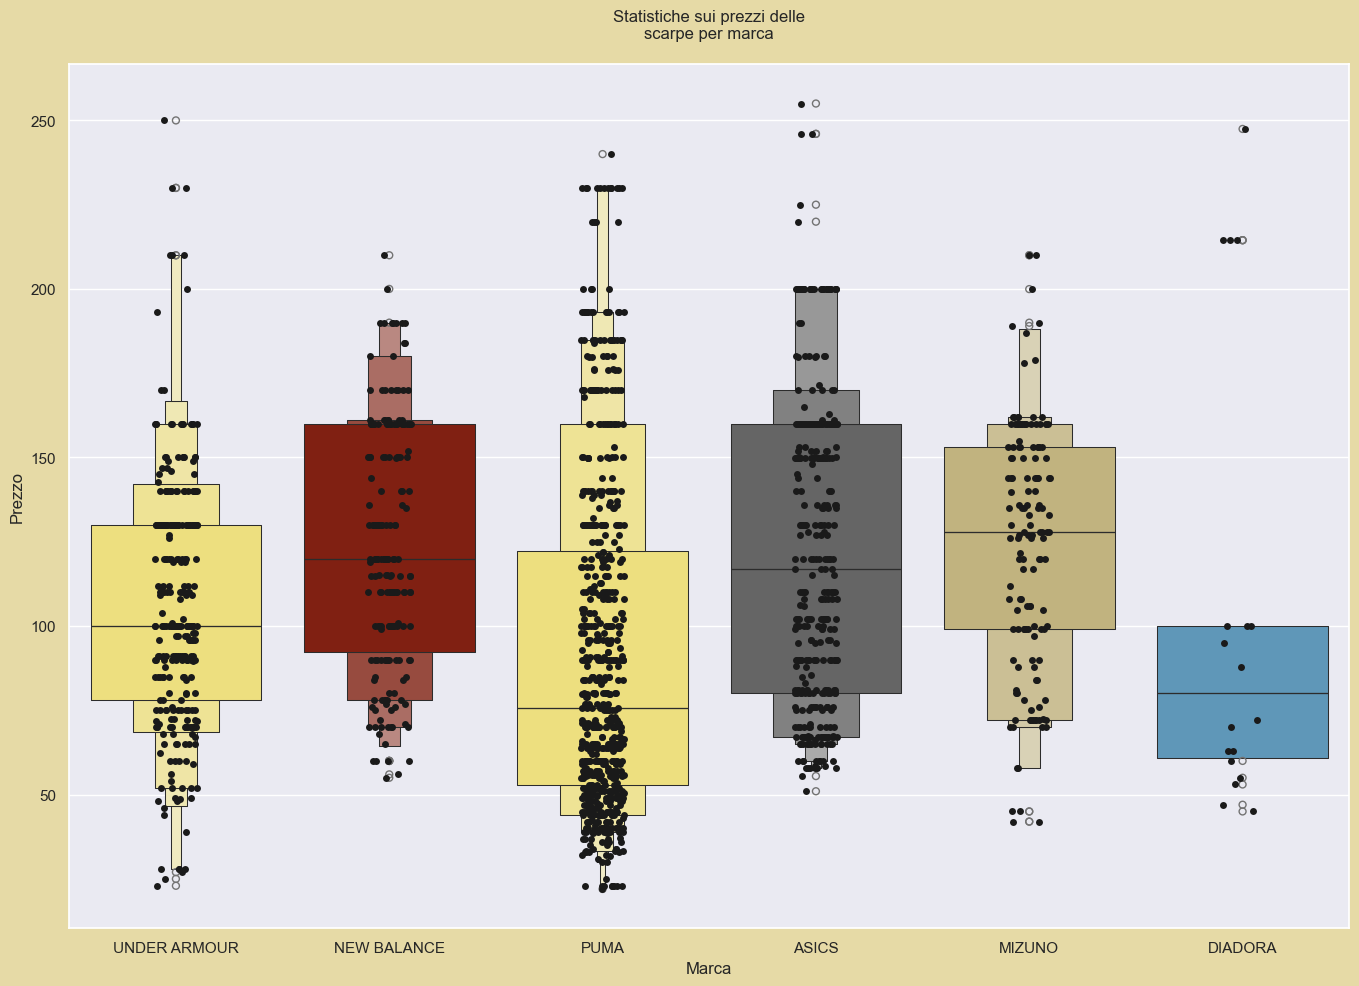

In [164]:
# definiamo i brand d'interesse
brands = list(price_shoes.index)
brands.append('MIZUNO')

# filtriamo per i brand s'interesse
analisa = modello_unici[modello_unici['marca'].isin(brands)]

# definiamo le palette di colori
c_1, c_2 = sns.color_palette('PuBu')[-3], sns.color_palette('afmhot')[-2]
c_3, c_4 = sns.color_palette('afmhot')[1], sns.color_palette('afmhot')[-2]
c_5 = sns.color_palette('RdGy')[-1]

# facciamo i dizionari delle palette
my_pltt = {x: 'y' for x in analisa['marca'].unique()}
my_pltt['DIADORA'], my_pltt['PUMA'], my_pltt['ASICS'] = c_1, c_2, c_5
my_pltt['UNDER ARMOUR'], my_pltt['NEW BALANCE'] = c_4, c_3

# facciamo il grafico
sns.set_theme(style='darkgrid')
fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 1.8])

# boxenplot
sns.boxenplot(data=analisa, x='marca', y='prezzo_effettivo', palette=my_pltt)

# stripplot
sns.stripplot(data=analisa, x='marca', y='prezzo_effettivo', color='k')

# impostiamo le etichette al titolo
axes.set_ylabel('Prezzo')
axes.set_xlabel('Marca')
axes.set_title('Statistiche sui prezzi delle\nscarpe per marca\n')

# impostiamo lo sfondo
fig.set_facecolor(color='#E6DAA6')

# mostra il grafico
plt.show()

In [168]:
brand = 'MIZUNO'

# Identifica i principali 4 competitor in base al numero di modelli offerti
modelli_per_marca = modello_unici['marca'].value_counts().drop(brand, errors='ignore')
top_competitor = modelli_per_marca.index[1]

# Lista delle marche da analizzare
marche_da_analizzare = [brand] + top_competitori

# Filtra il DataFrame per le marche selezionate
df_marche = modello_unici[modello_unici['marca'].isin(marche_da_analizzare)]

# Calcola il prezzo medio effettivo e ordinario per ogni marca, la quantita dei prodotti per ogni sport 
pm = df_marche.groupby('marca').agg(
    prezzo_effettivo_medio=('prezzo_effettivo', 'mean'),
    prezzo_ordinario_medio=('prezzo_ordinario', 'mean'),
    quantita=('sport', 'sum')
).reset_index()

# Imposta la marca come indice per facilitare il plotting
pm = pm.set_index('marca')

# Crea il grafico a barre affiancate
ax = pm[['prezzo_effettivo_medio', 'prezzo_ordinario_medio','sport']].plot(
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'orange'],
    rot=45
)

# Aggiungi etichette e titolo
plt.ylabel('Prezzo Medio (€)')
plt.title('Prezzo Medio Effettivo e Ordinario per Mizuno e il Competitor principale')
plt.legend(['Prezzo Effettivo Medio', 'Prezzo Ordinario Medio'])
plt.tight_layout()
plt.show()

TypeError: 'Series' object is not callable

In [5]:
#Statistics data
statistics_table = modello_unici.pivot_table(index='marca', values='prezzo_effettivo', aggfunc=('mean', 'median', 'max', 'min'))
statistics_table.reset_index(inplace=True)
statistics_table.columns = ['Brand', 'Max', 'Mean', 'Median', 'Min']
statistics_table.sort_values('Median', ascending=False, inplace=True)
statistics_table.index = np.arange(1, 7)
statistics_table['Mean'] = statistics_table.apply(lambda x: np.round(x.Mean, 2), axis=1)
statistics_table

NameError: name 'modello_unici' is not defined